In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from fastbook import *
from katlas.core import Data
from sklearn.manifold import TSNE
from katlas.plot import *
import seaborn as sns

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# Dimensionality reduction

In this module, we will use three method to visualize cluster:
- TSNE
- UMAP
- PCA

We will visualize raw target, standardized, log transformed, and normalized (from paper) target

## Standardized target

In [ ]:
df = Data.get_standard_stack()

In [ ]:
info = Data.get_kinase_info()[['kinase','Family','category','category_big']]

In [ ]:
kinase = df[['kinase']].merge(info,'left')

In [ ]:
(df.kinase == kinase.kinase).value_counts()

True    303
Name: kinase, dtype: int64

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


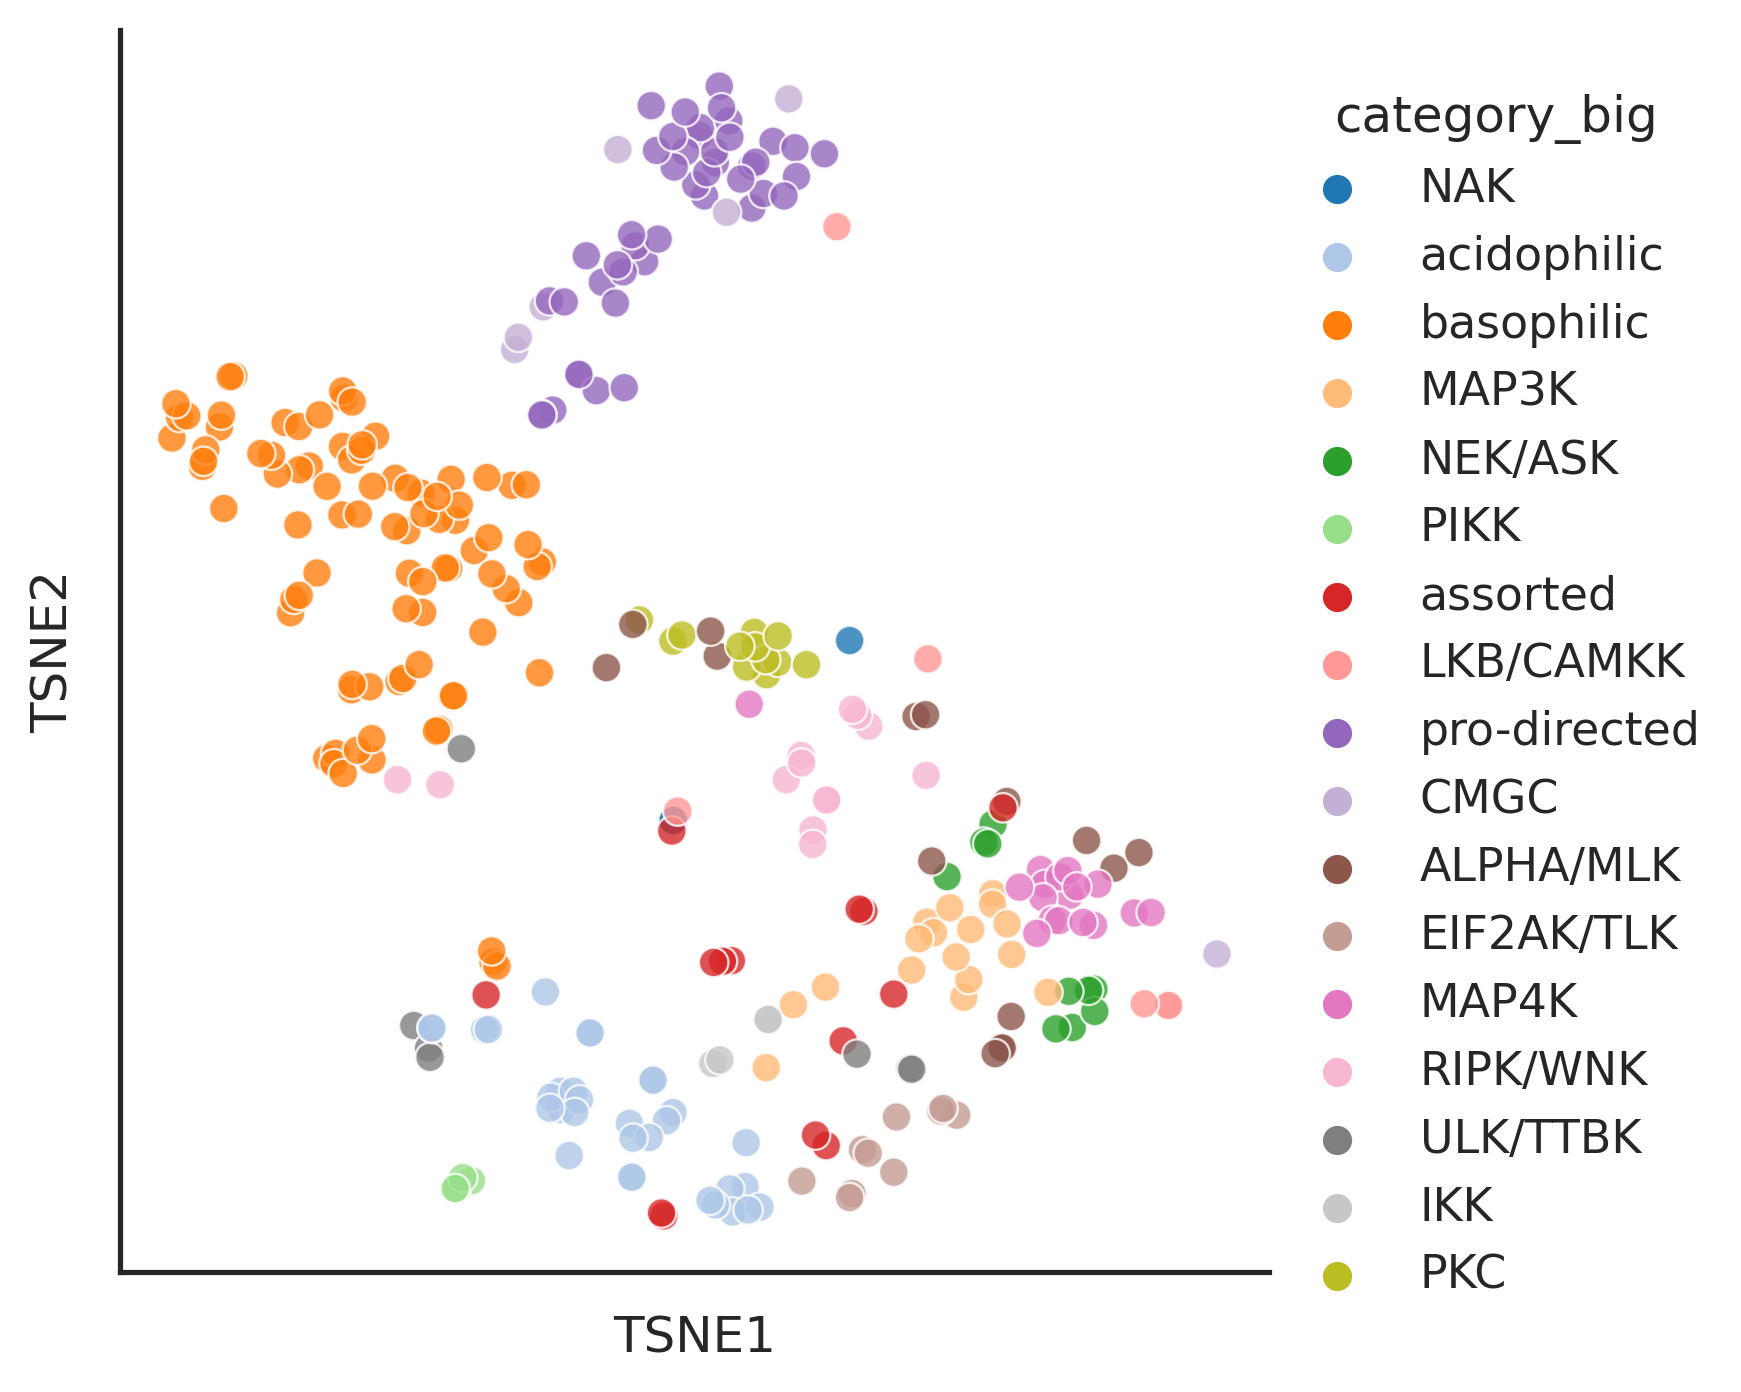

In [ ]:
plot_cluster(df, method='tsne',hue = kinase.category_big,legend=True)

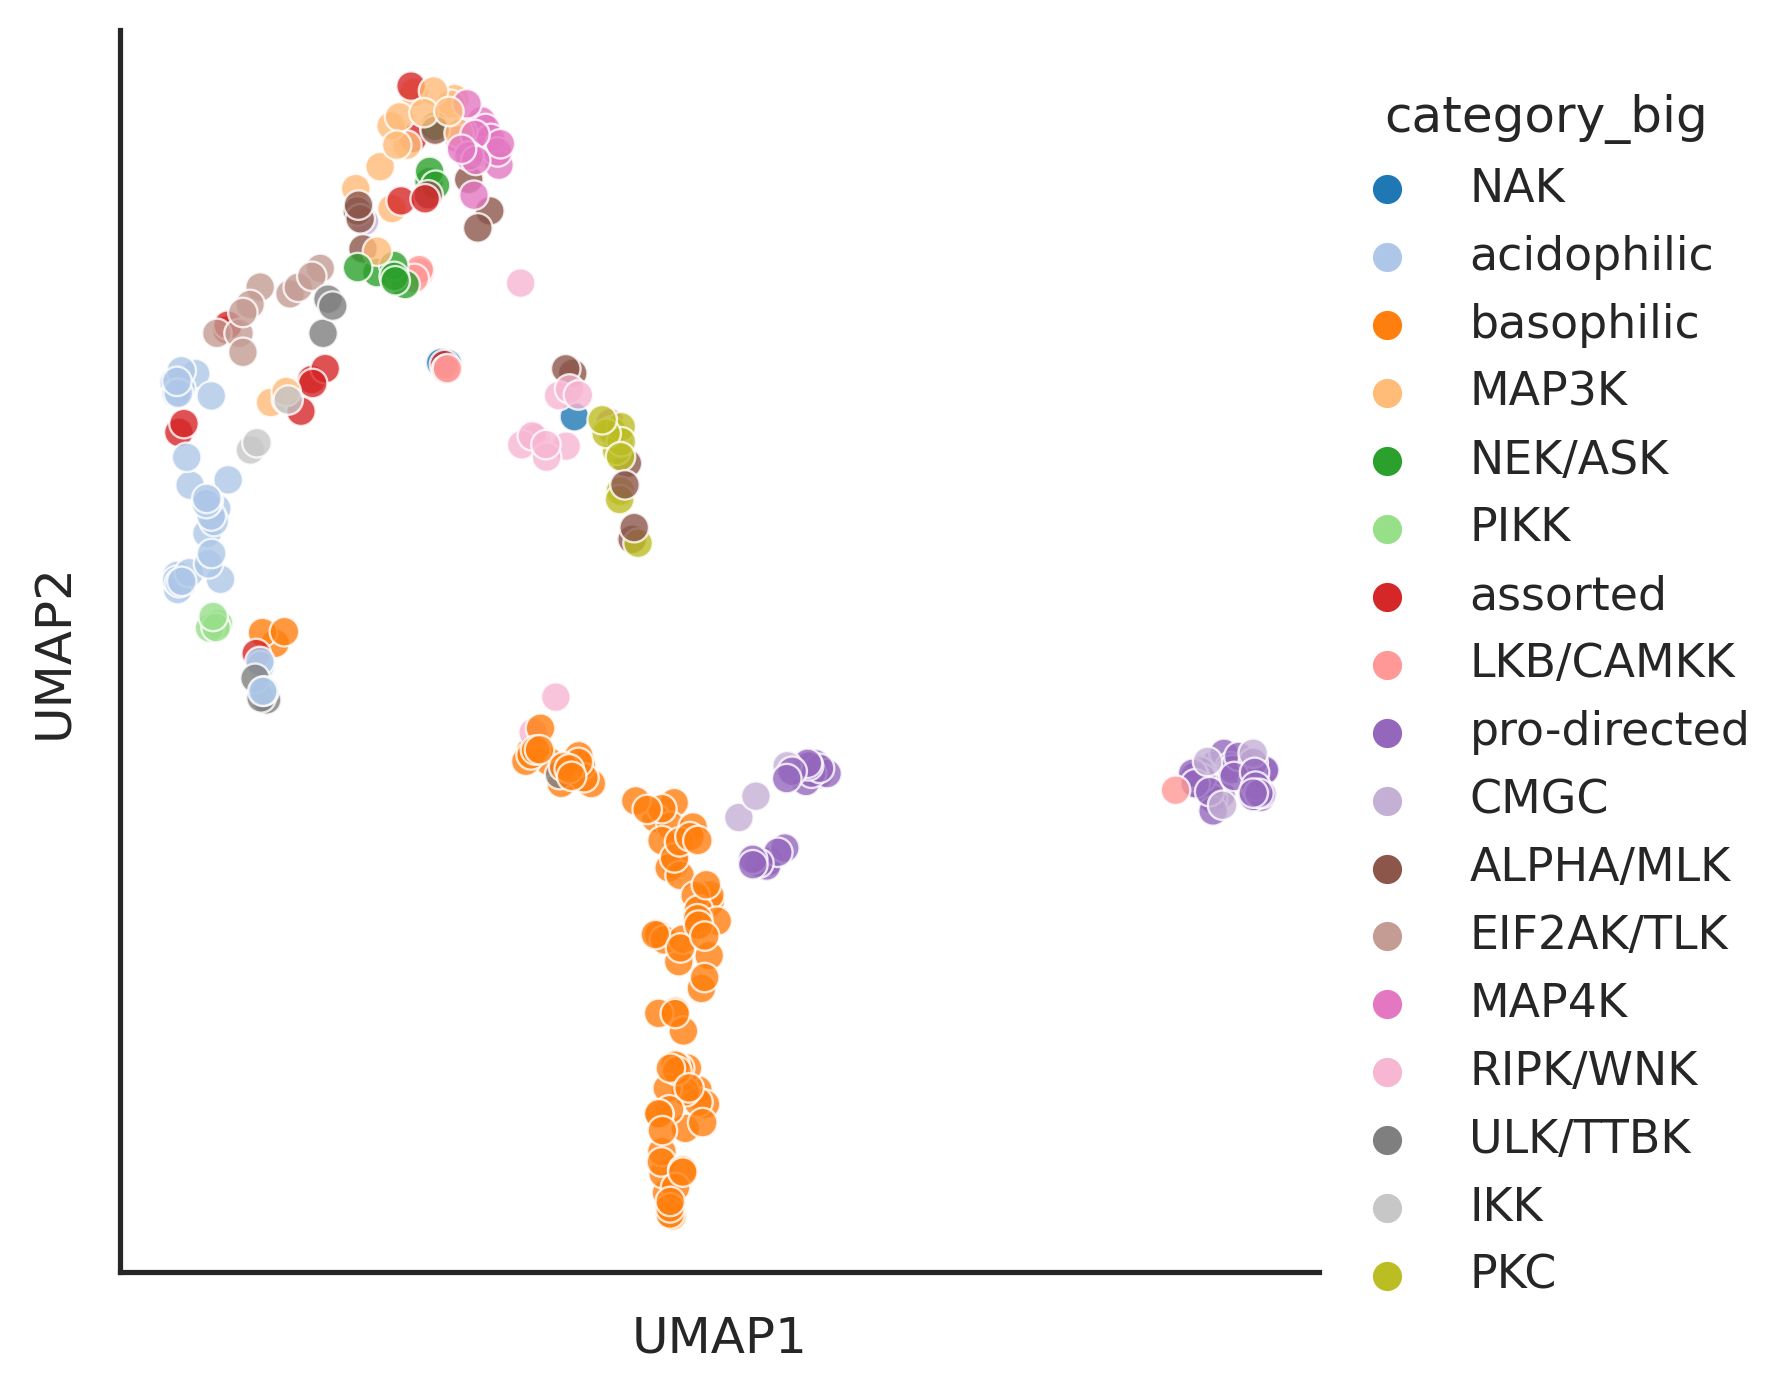

In [ ]:
plot_cluster(df, method='umap',hue = kinase.category_big,legend=True)

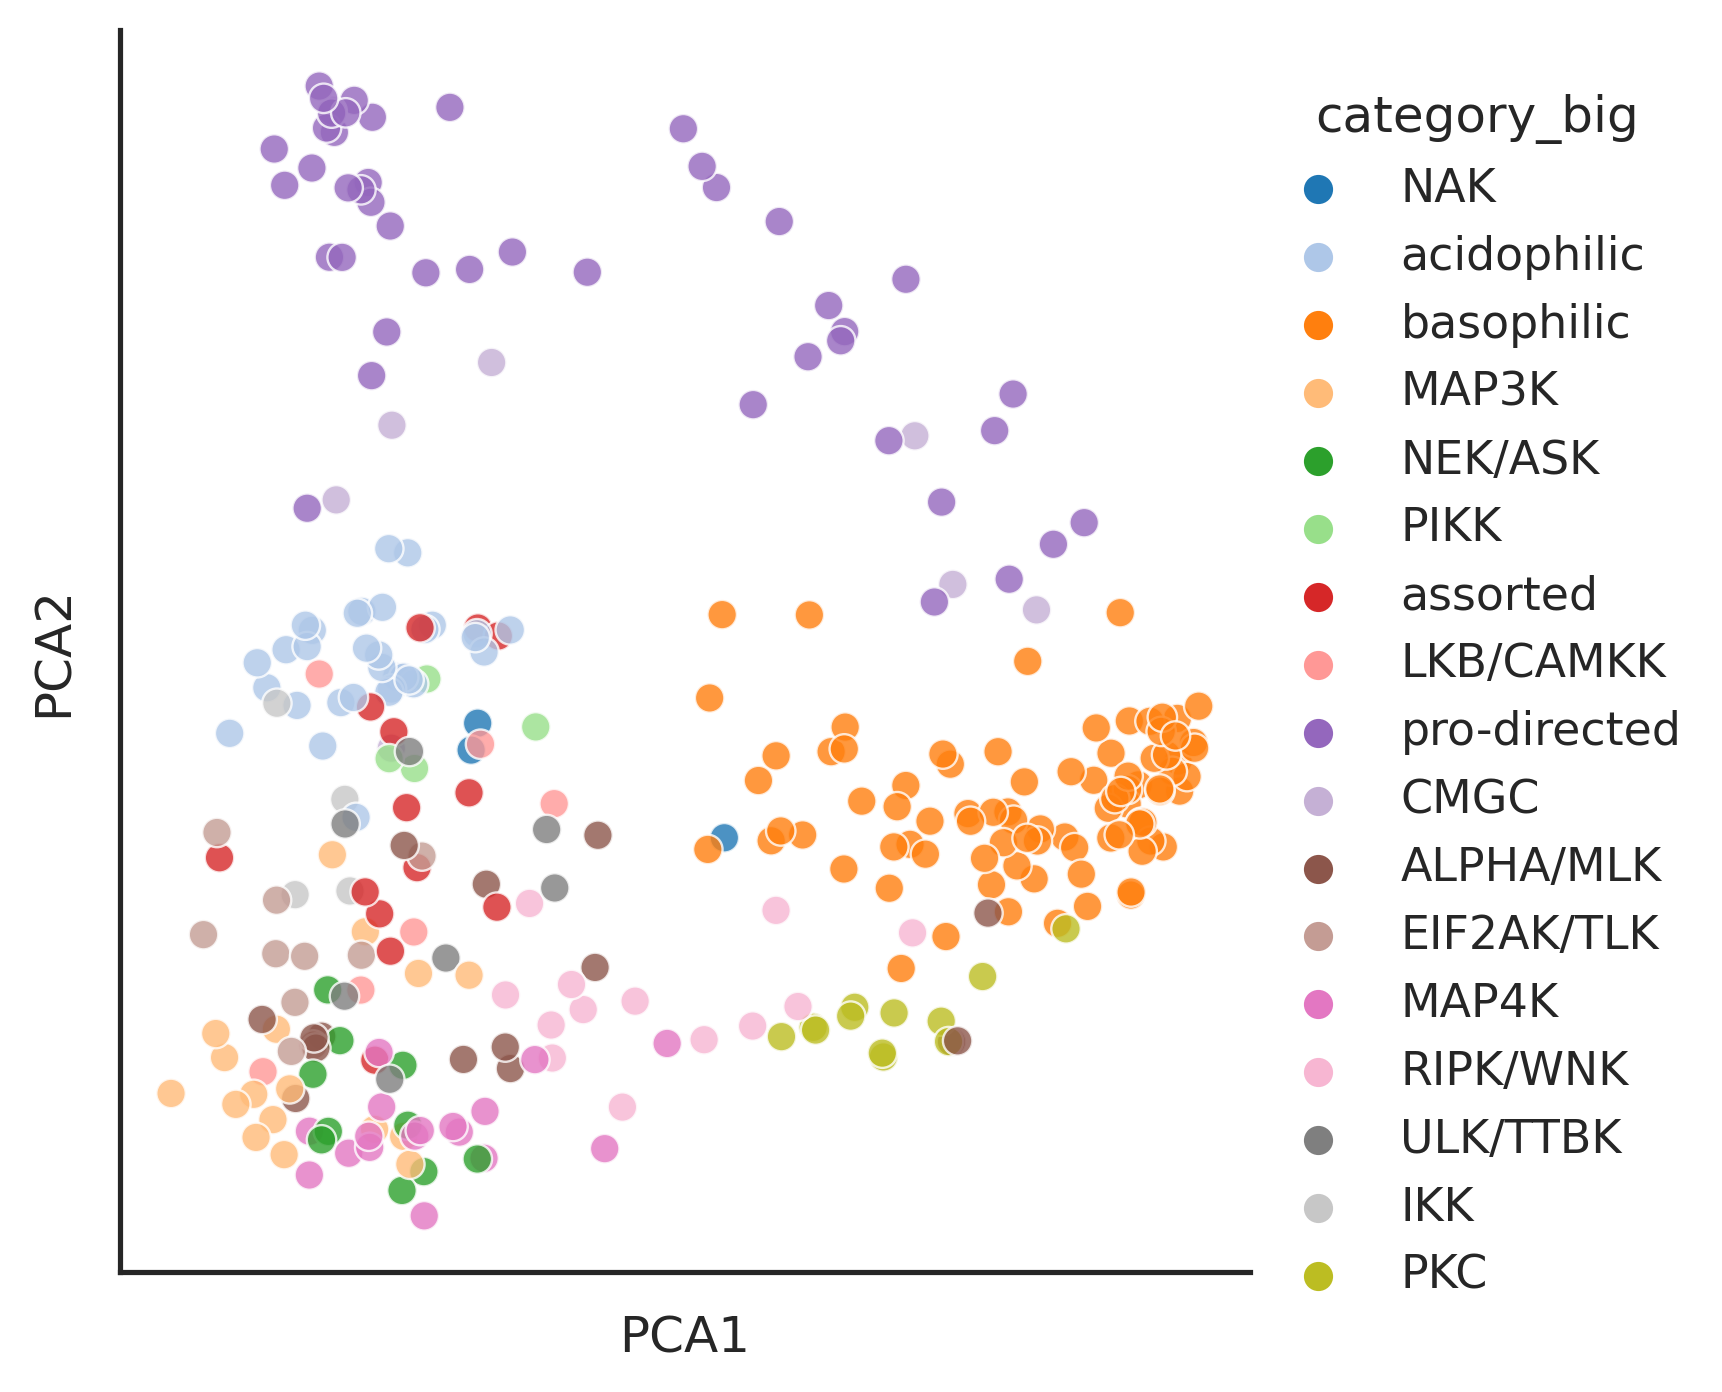

In [ ]:
plot_cluster(df, method='pca',hue = kinase.category_big,legend=True)

## Raw

In [ ]:
raw = Data.get_kinase_raw()

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


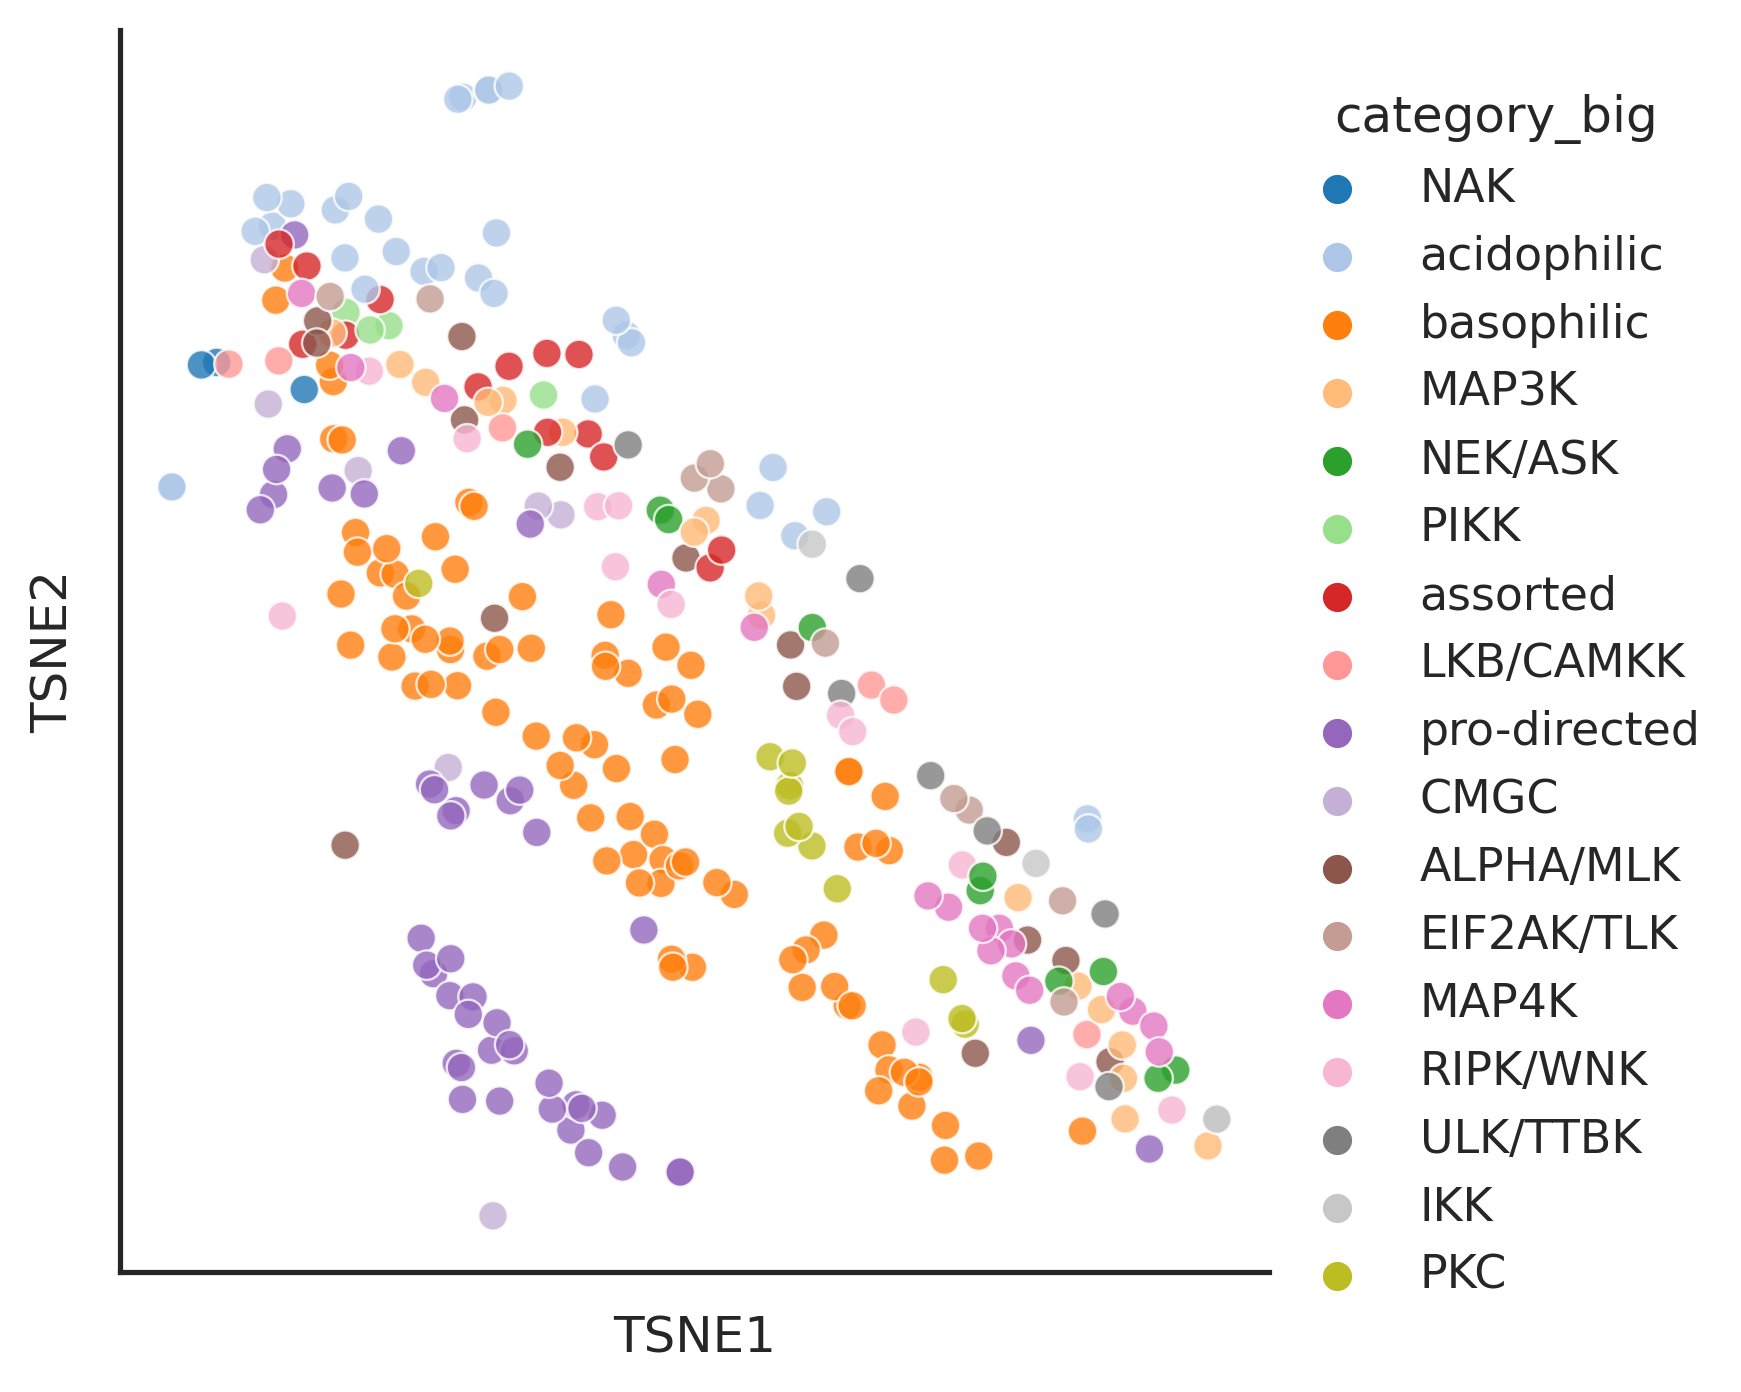

In [ ]:
plot_cluster(raw, method='tsne',hue = kinase.category_big,legend=True)

In [ ]:
r = raw.set_index('kinase')

In [ ]:
mean_raw = (r.T/r.T.mean()).T

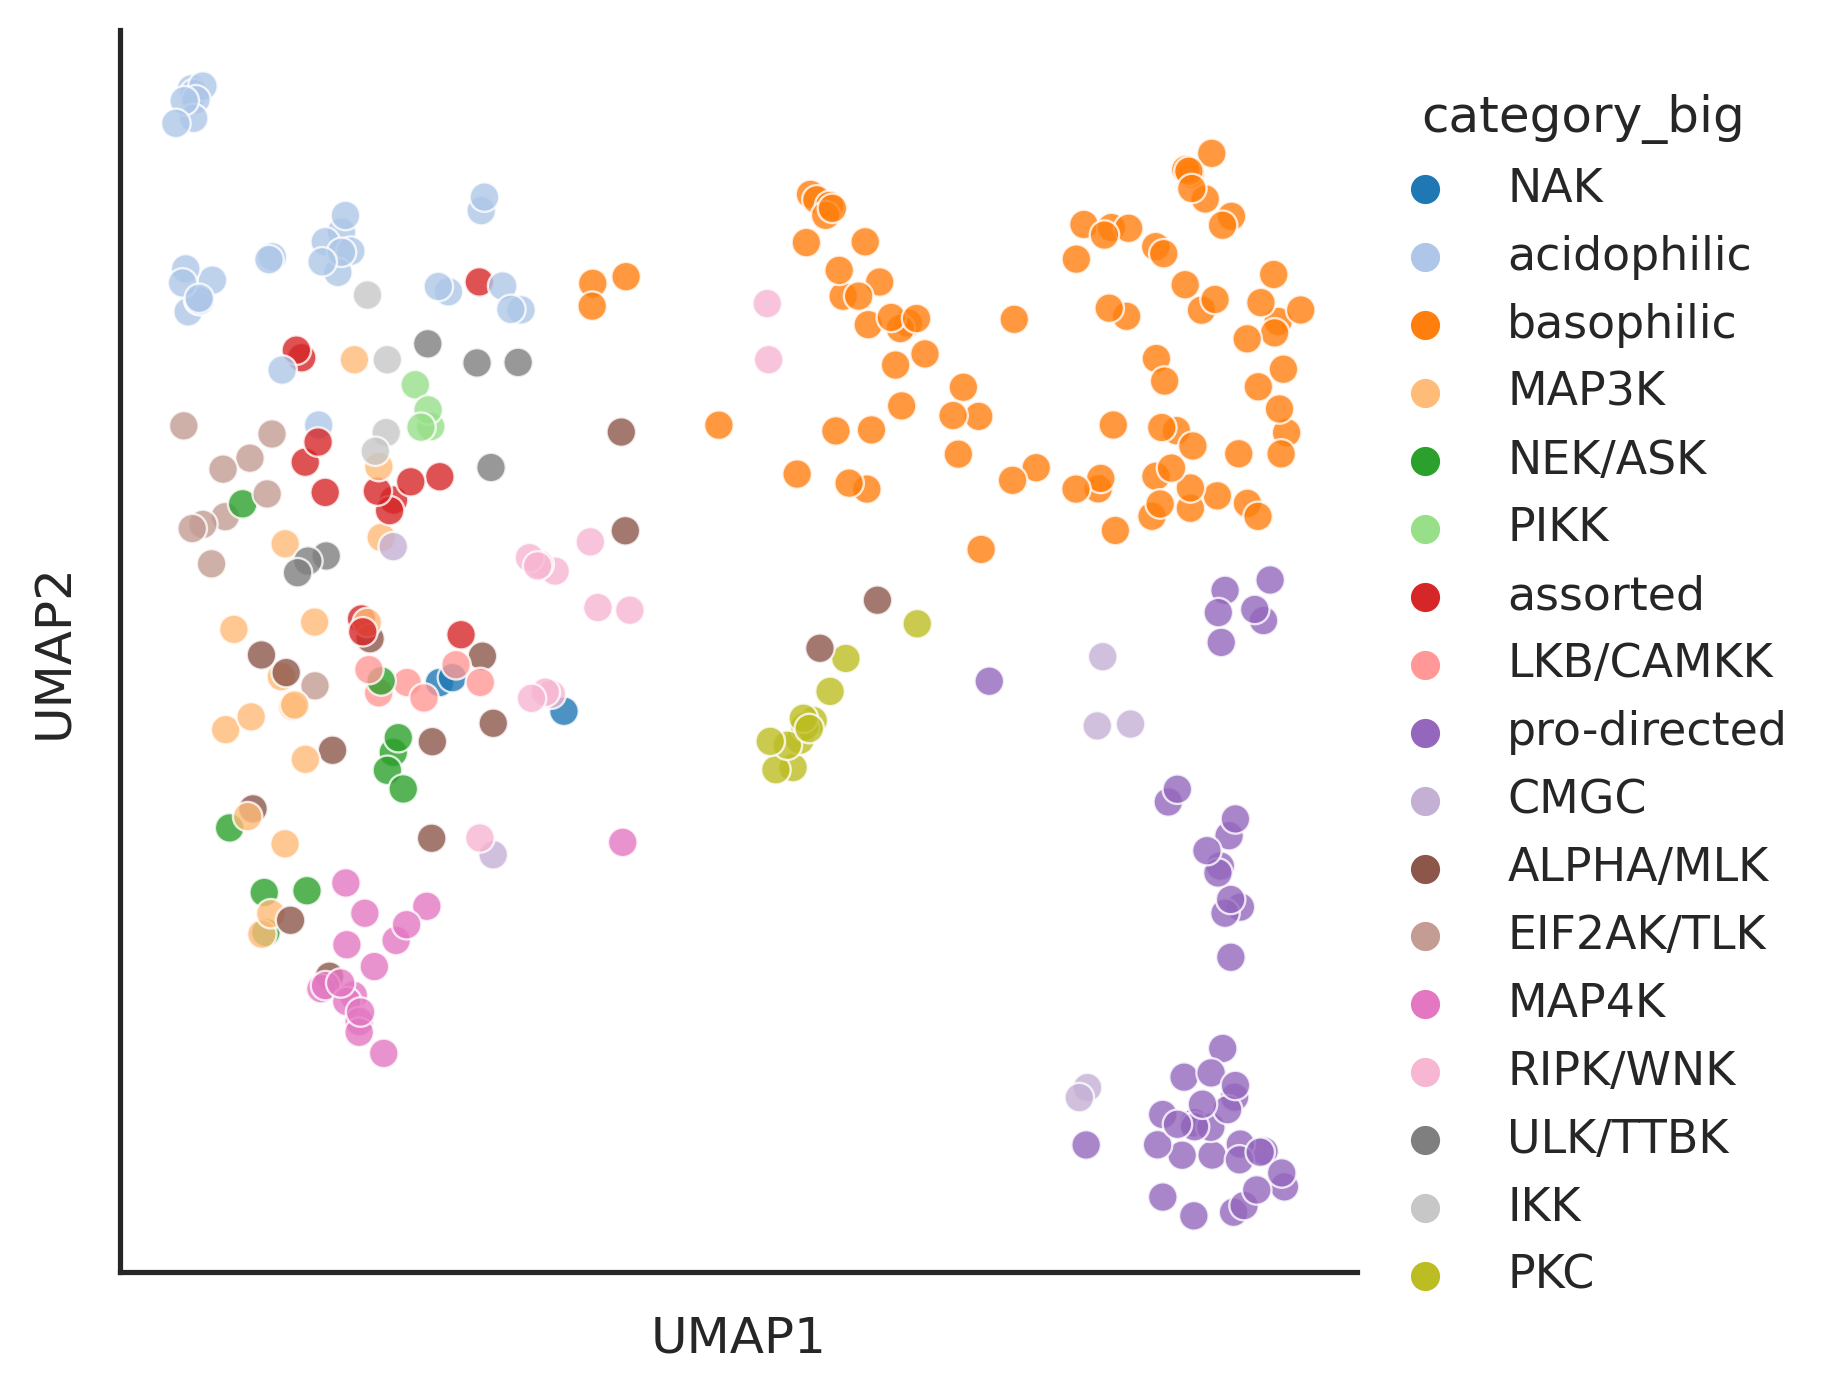

In [ ]:
plot_cluster(mean_raw, method='umap',hue = kinase.category_big,legend=True)

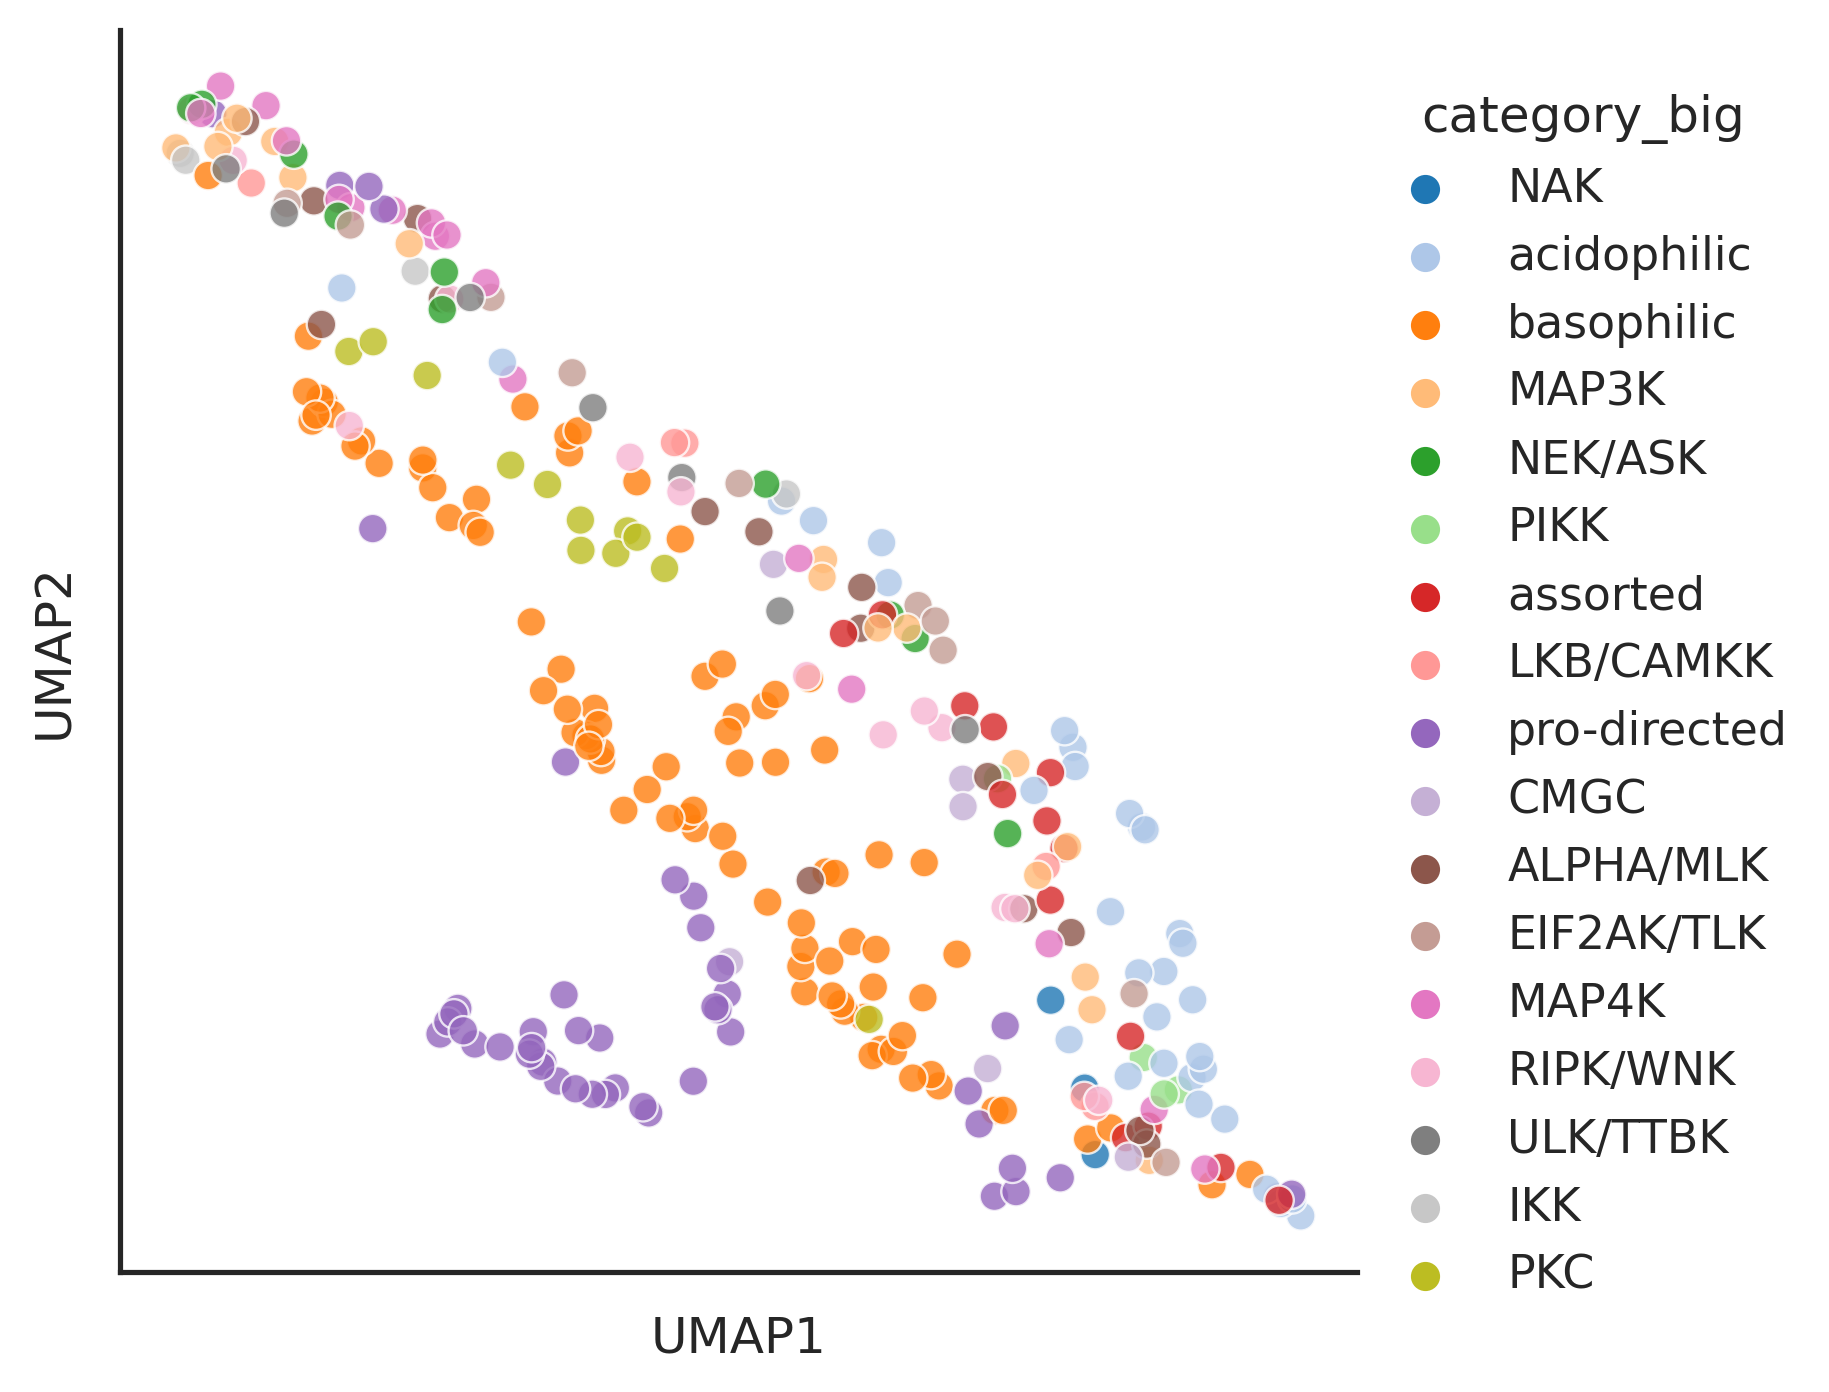

In [ ]:
plot_cluster(raw, method='umap',hue = kinase.category_big,legend=True)

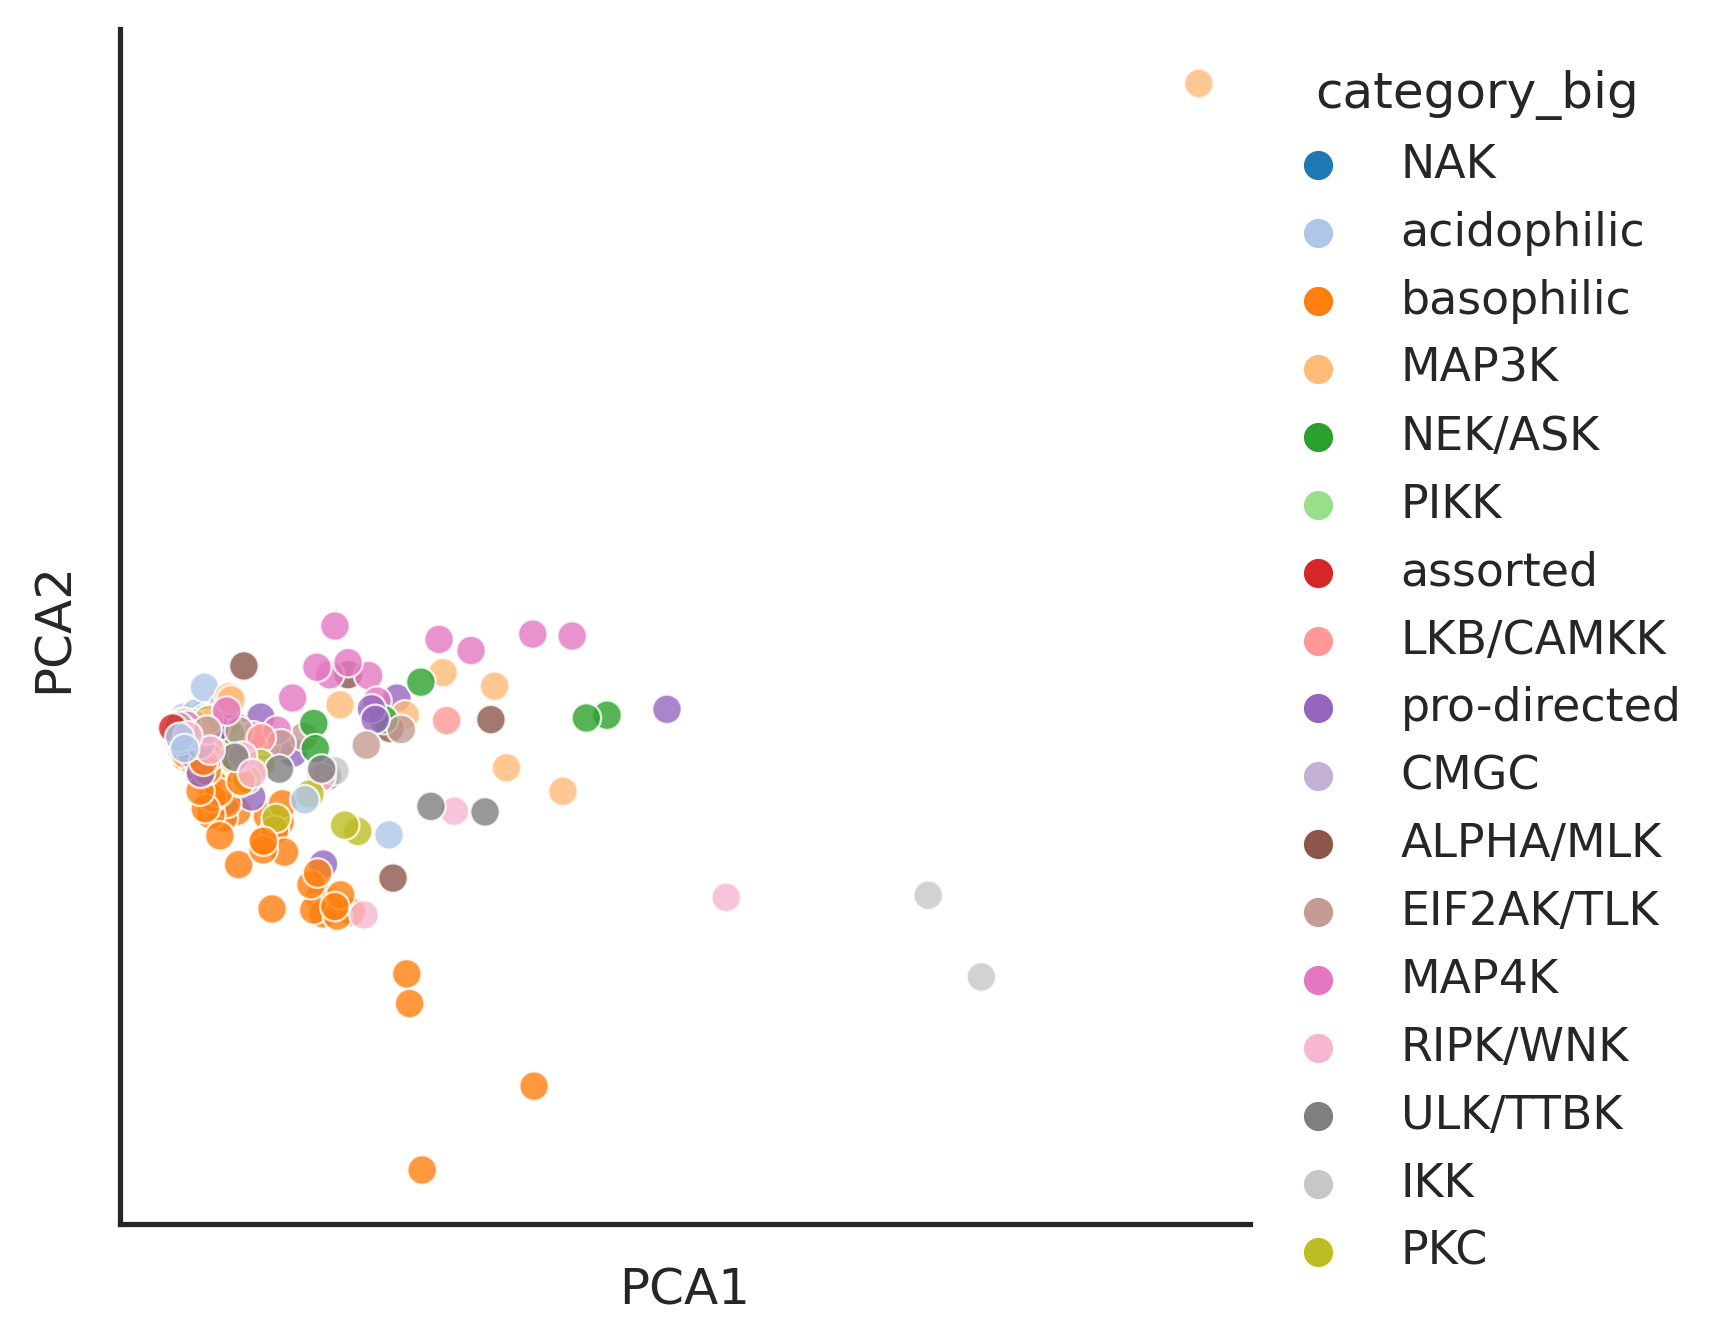

In [ ]:
plot_cluster(raw, method='pca',hue = kinase.category_big,legend=True)

## Log transformed

In [ ]:
log = Data.get_log_stack()

In [ ]:
info = Data.get_kinase_info()[['kinase','Family','category','category_big']]

kinase = log[['kinase']].merge(info,'left')

In [ ]:
(log.kinase == kinase.kinase).value_counts()

True    303
Name: kinase, dtype: int64

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


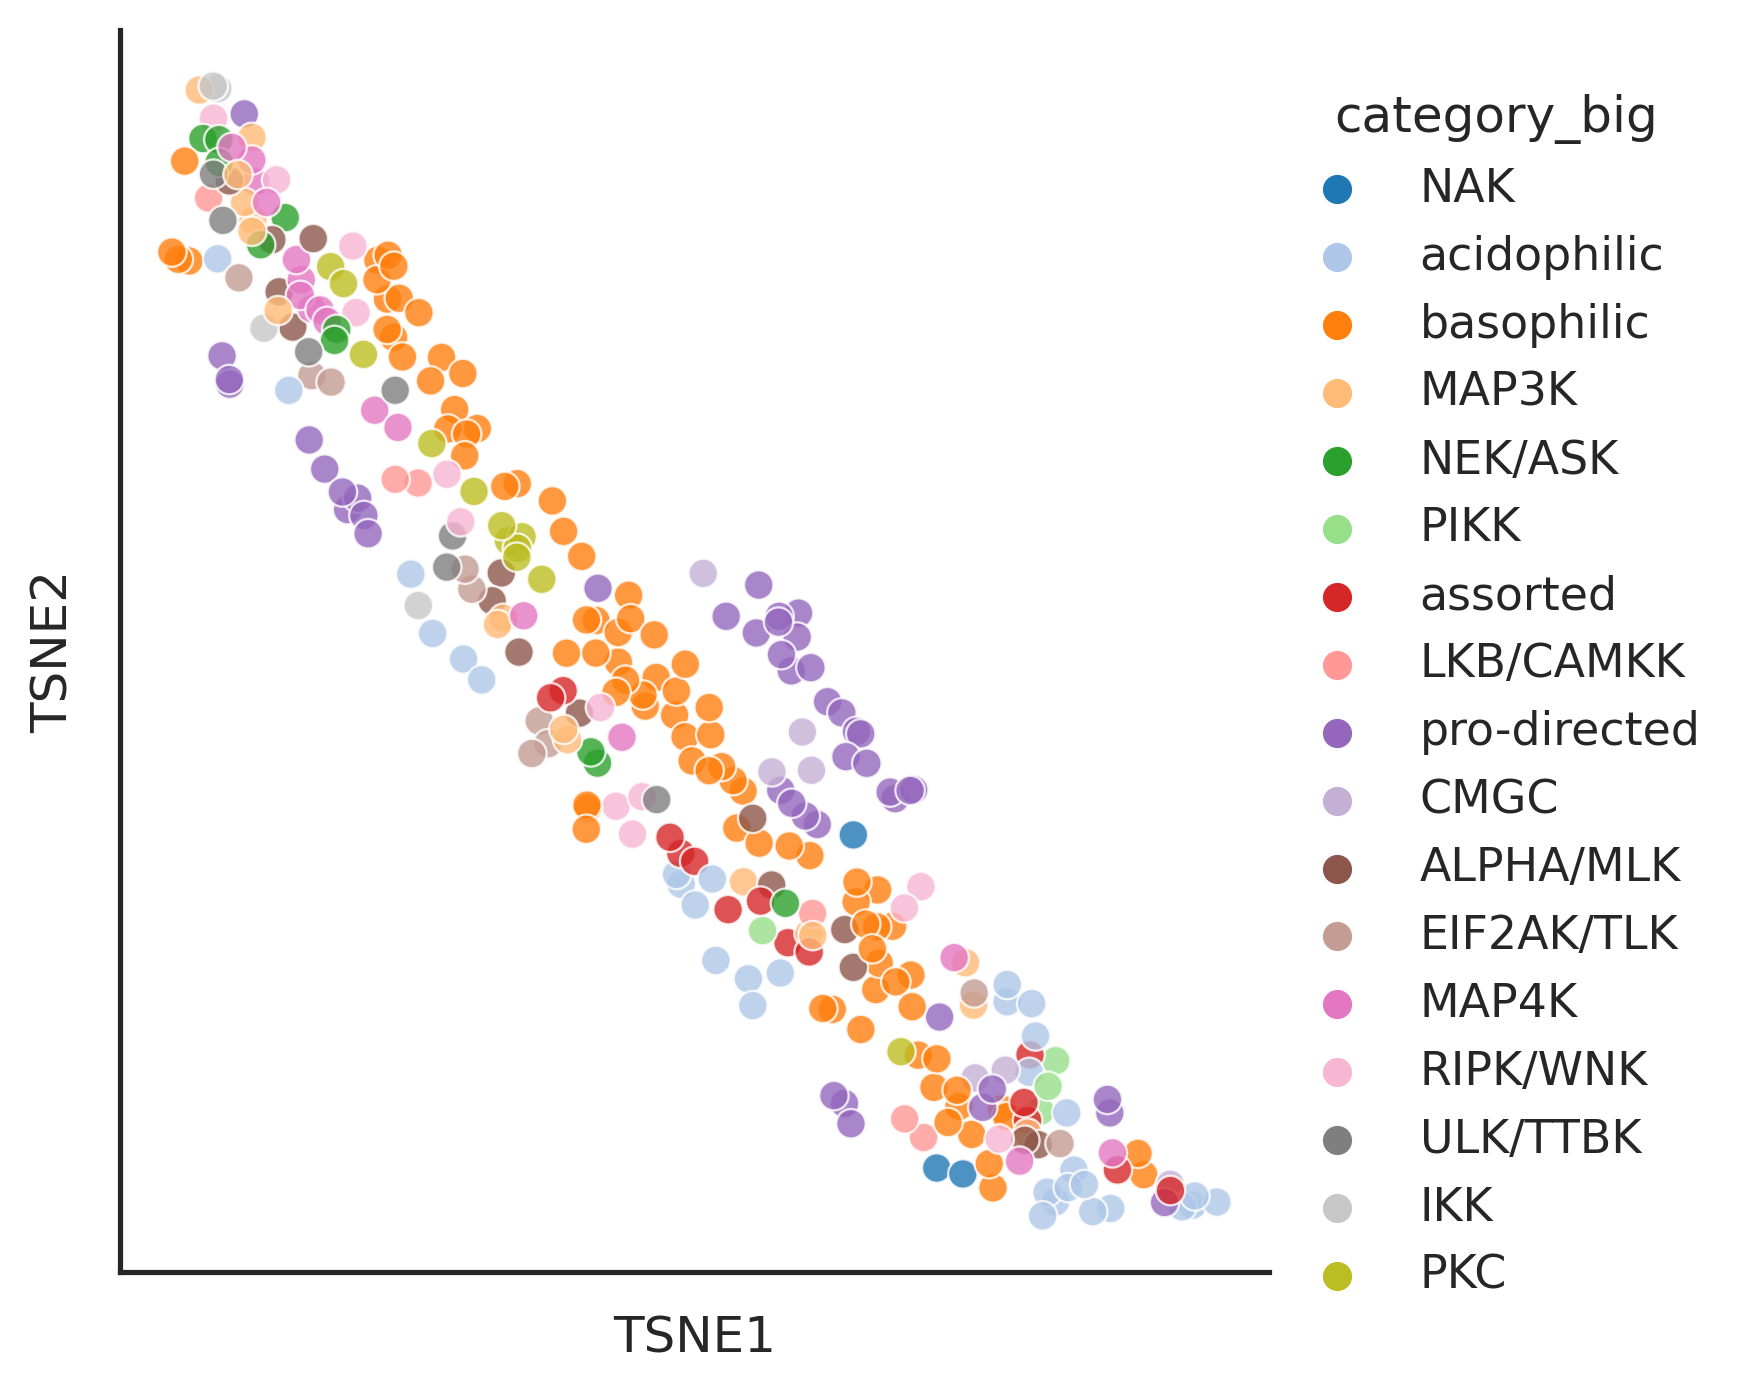

In [ ]:
plot_cluster(log, method='tsne',hue = kinase.category_big,legend=True)

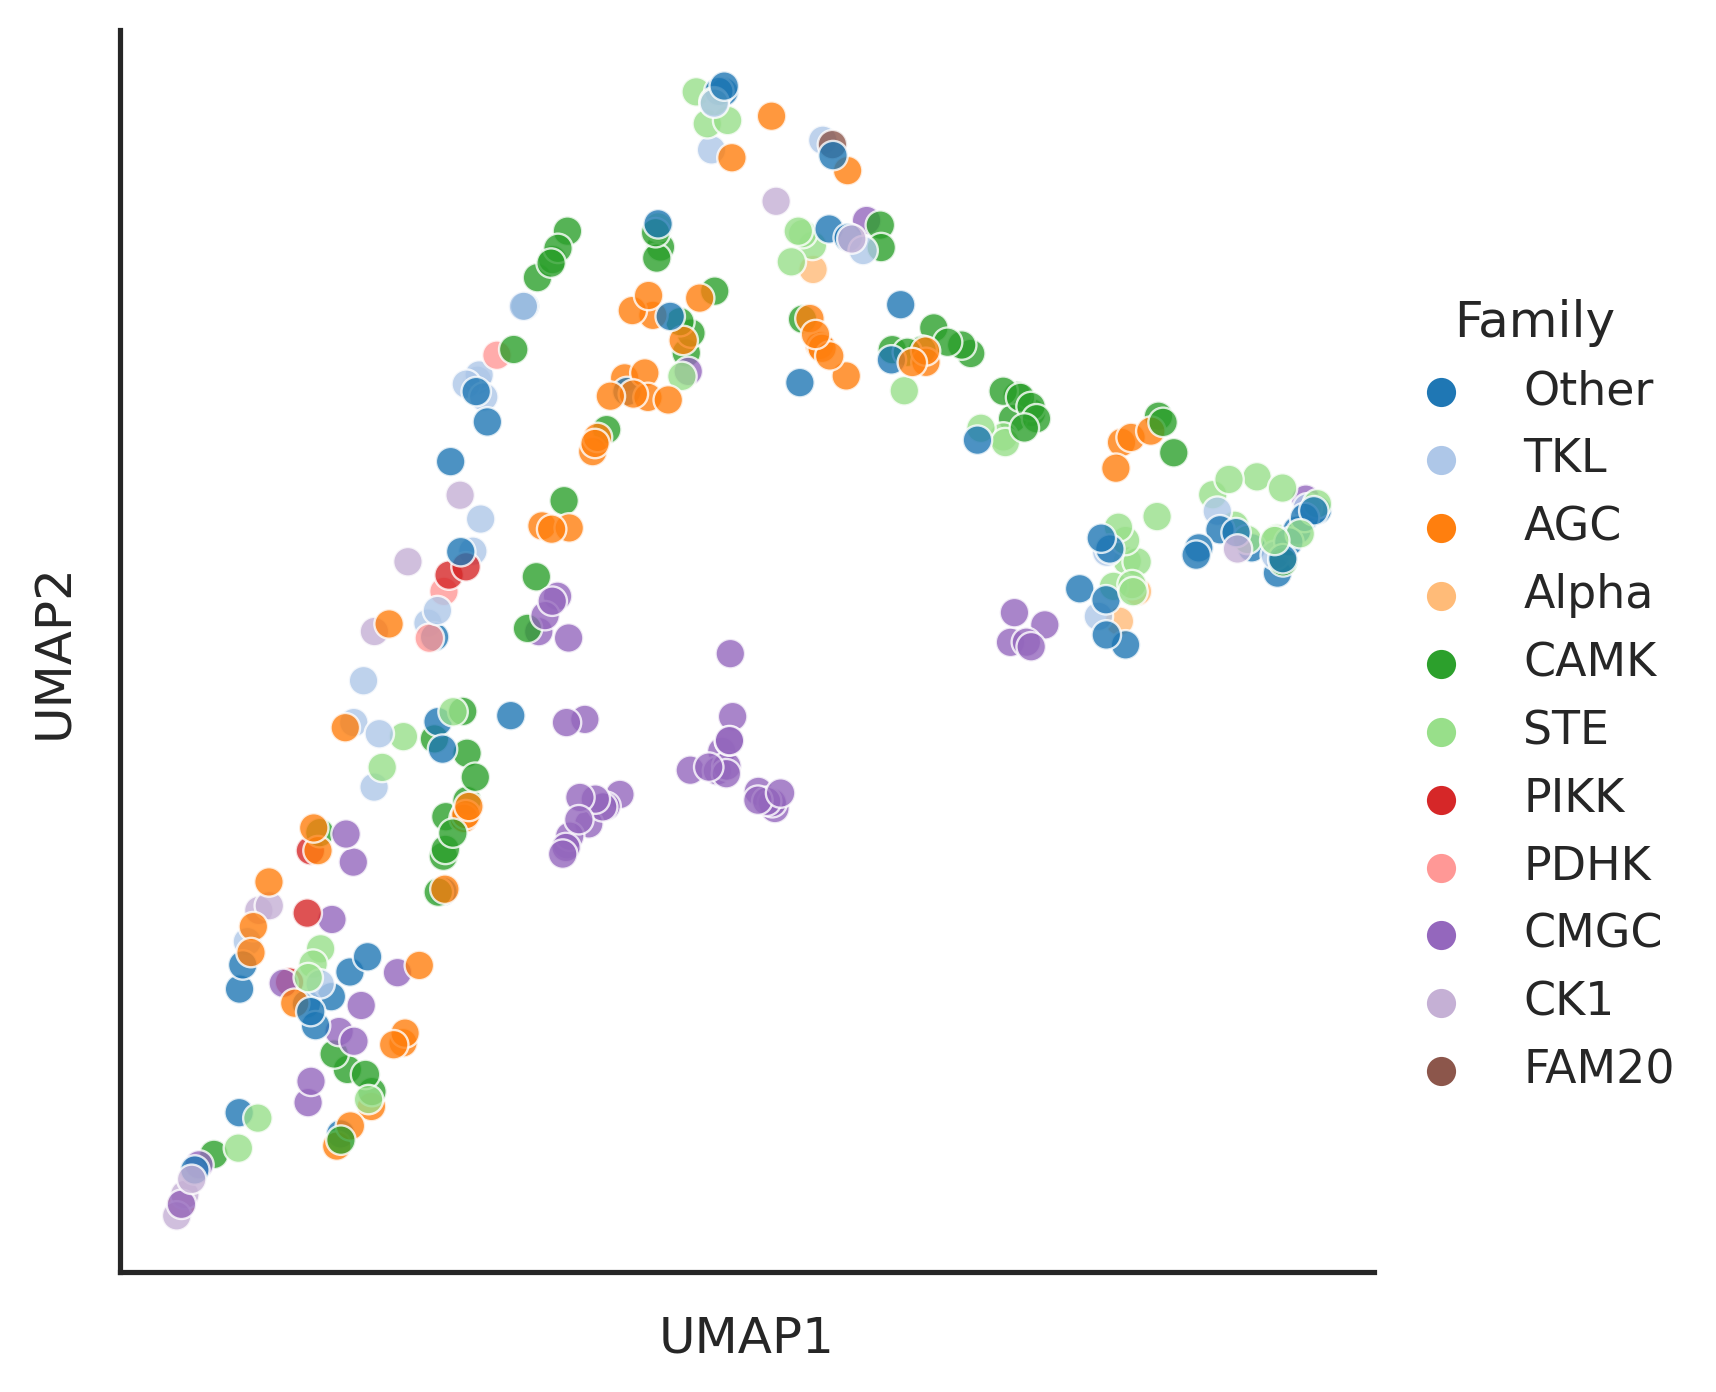

In [ ]:
plot_cluster(log, method='umap',hue = kinase.Family,legend=True, complexity=7)

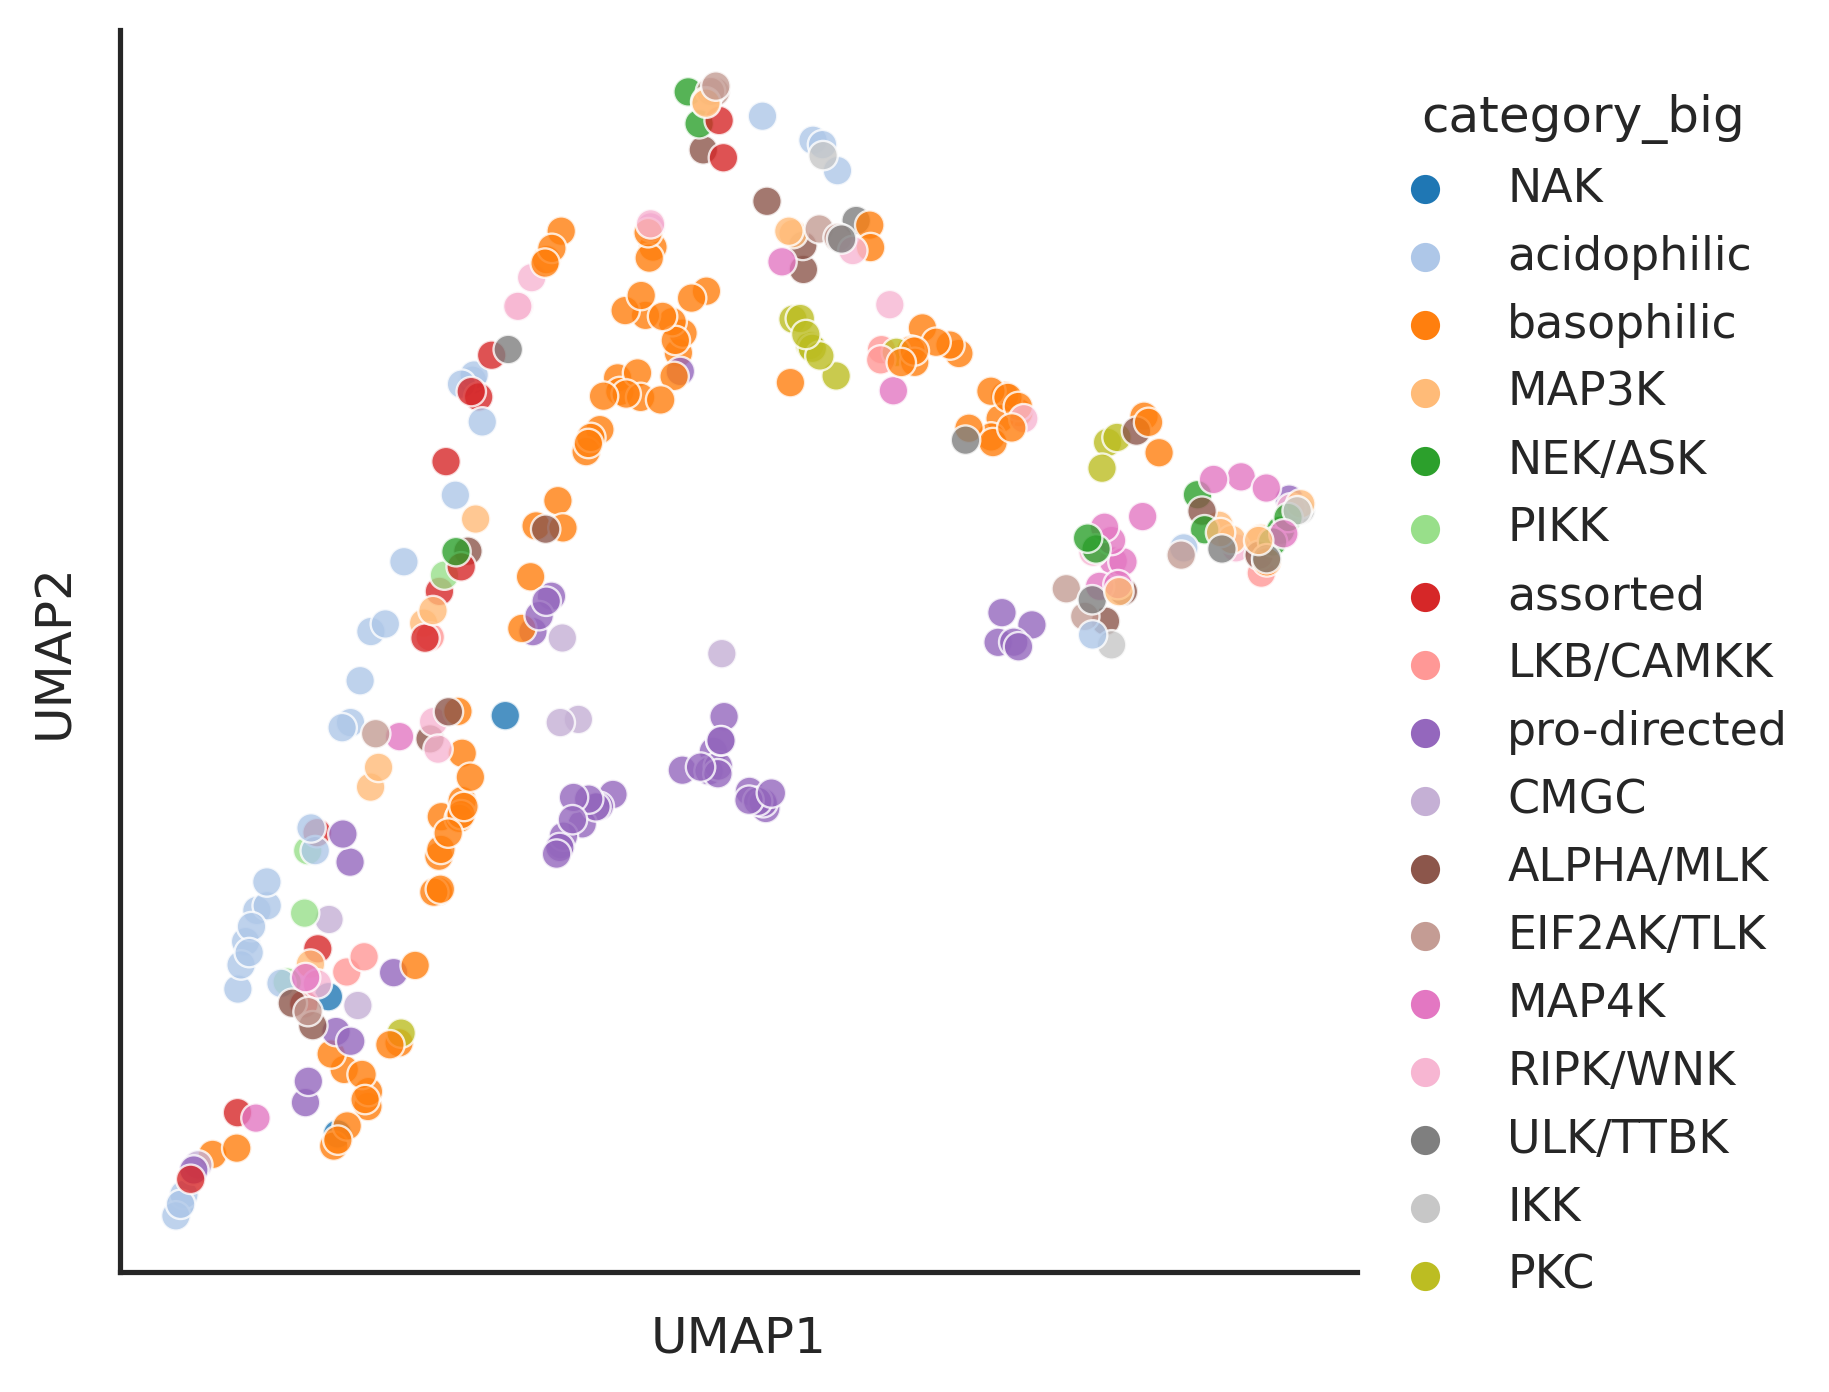

In [ ]:
plot_cluster(log, method='umap',hue = kinase.category_big,legend=True, complexity=7)

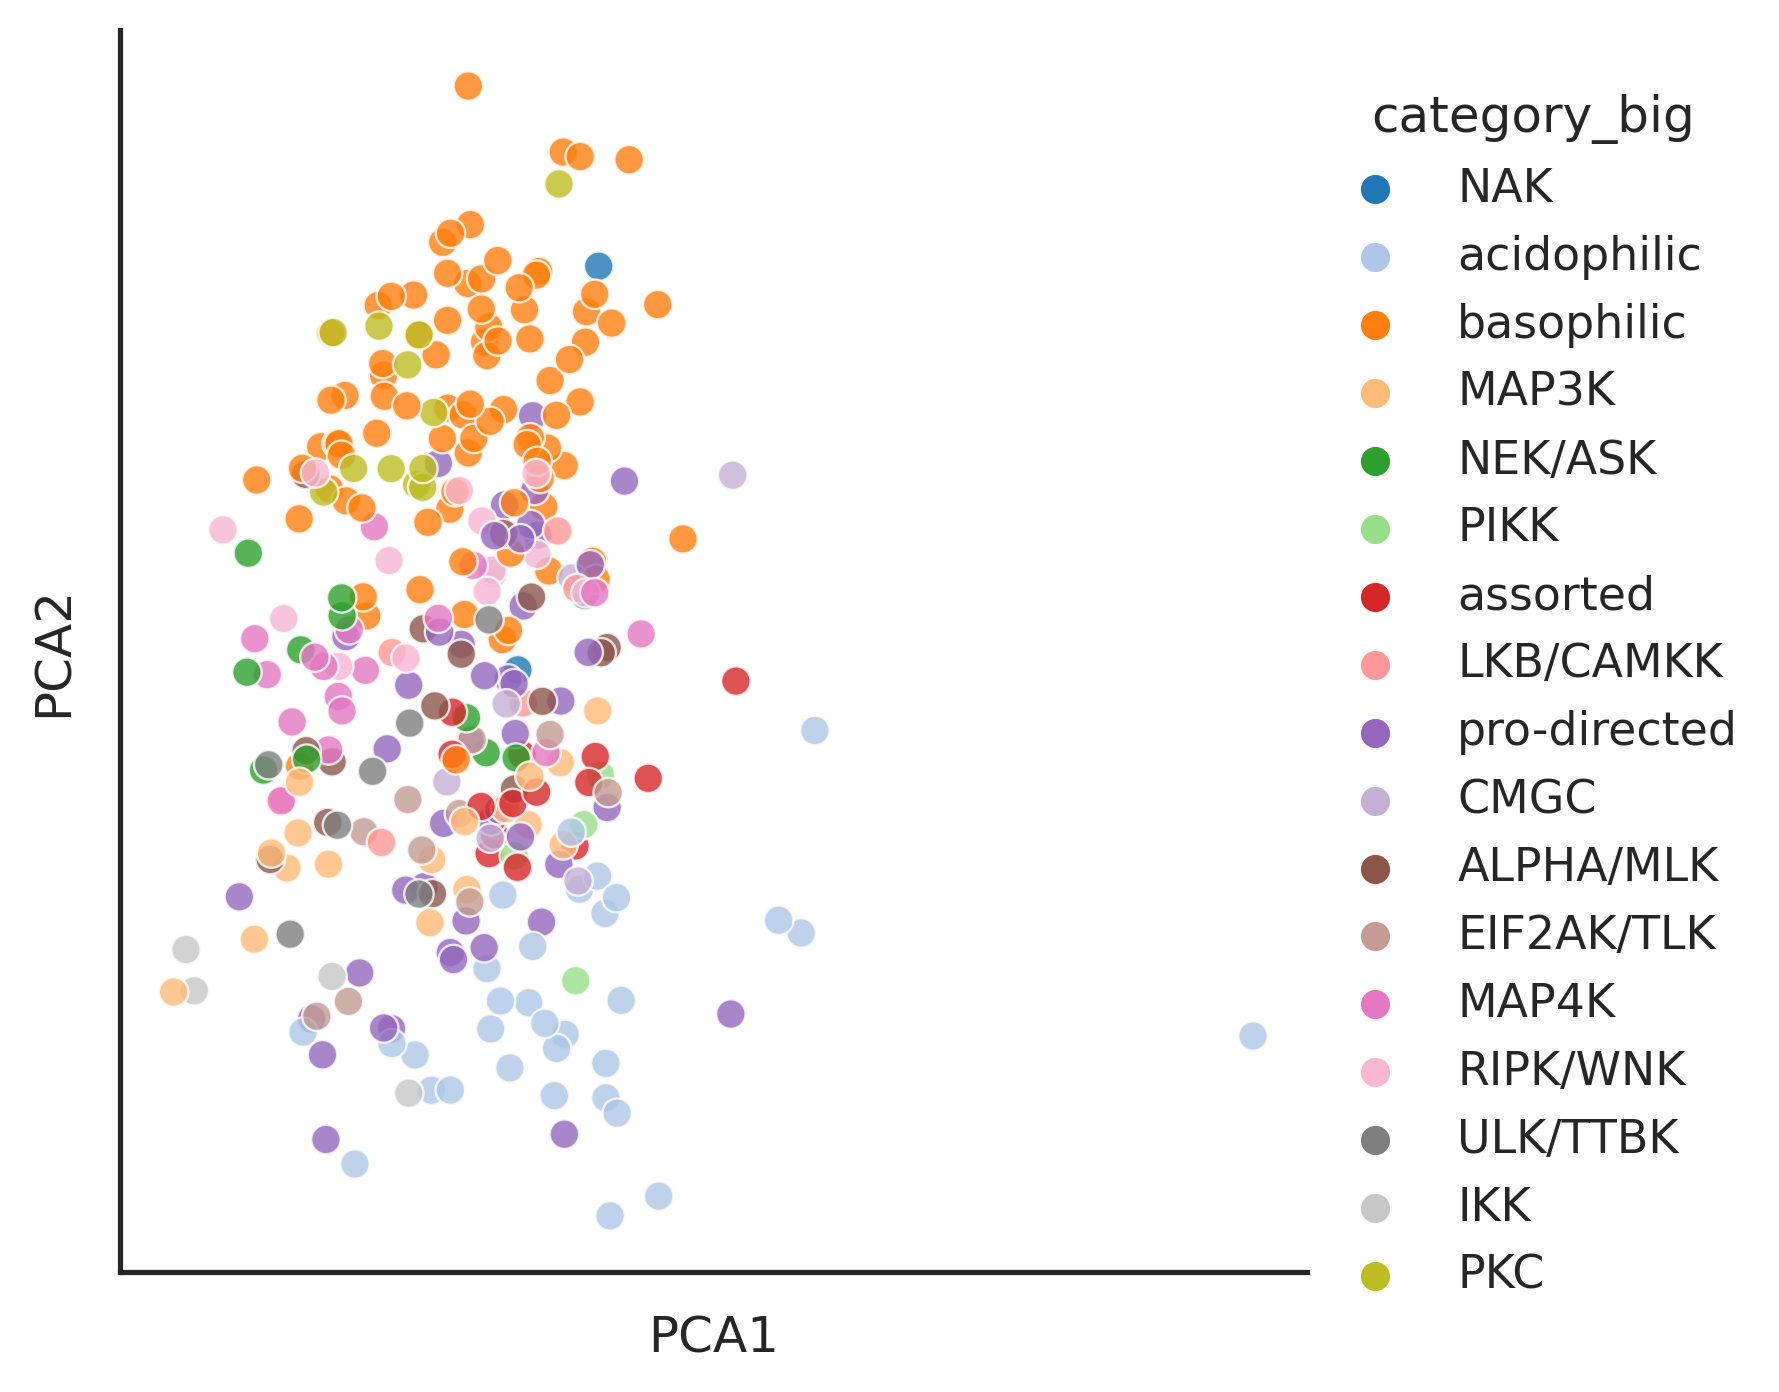

In [ ]:
plot_cluster(log, method='pca',hue = kinase.category_big,legend=True)

## Normalized from paper

In [ ]:
df2 = Data.get_kinase_norm()

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


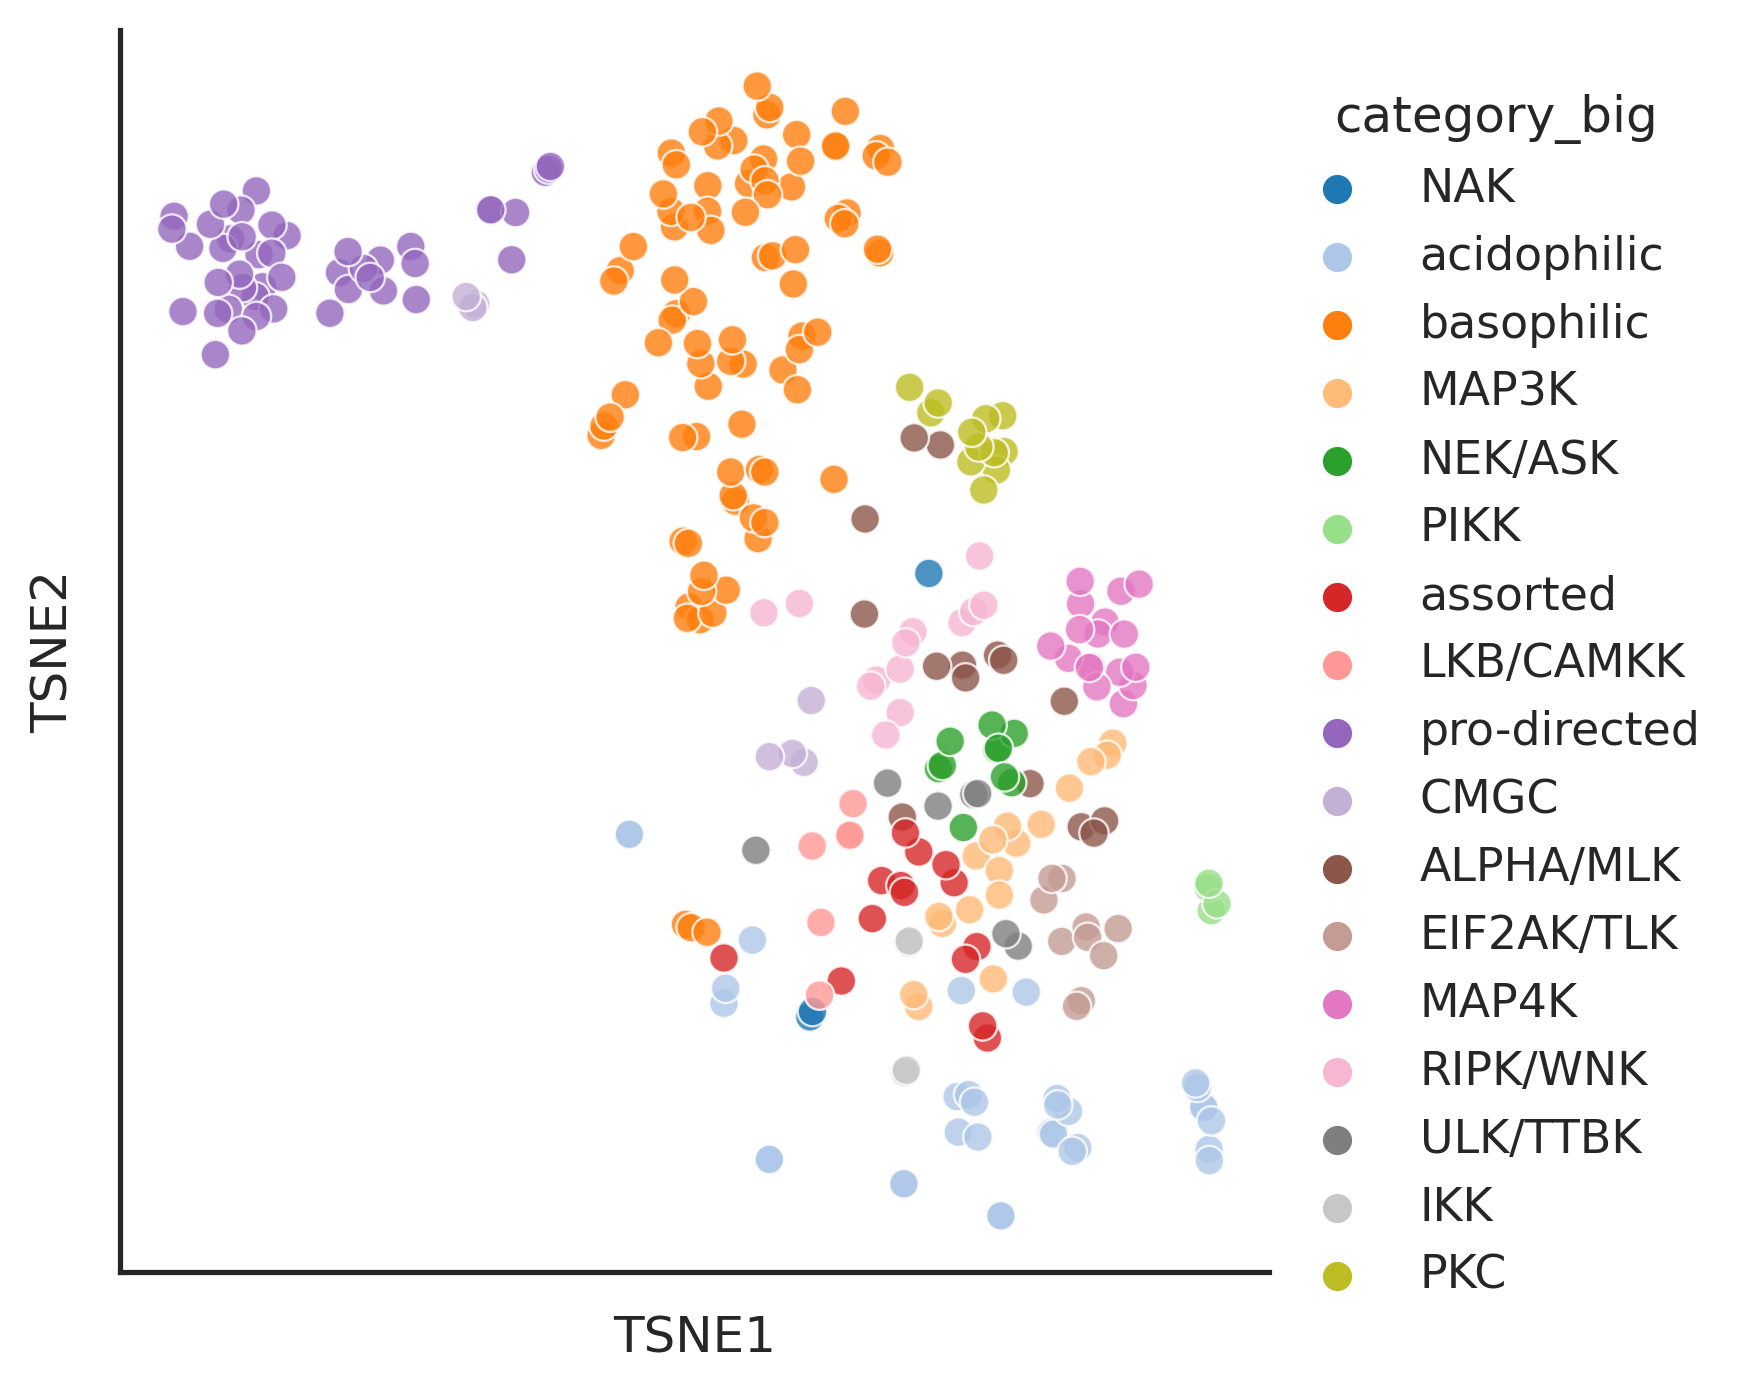

In [ ]:
plot_cluster(df2, method='tsne',hue = kinase.category_big,legend=True)

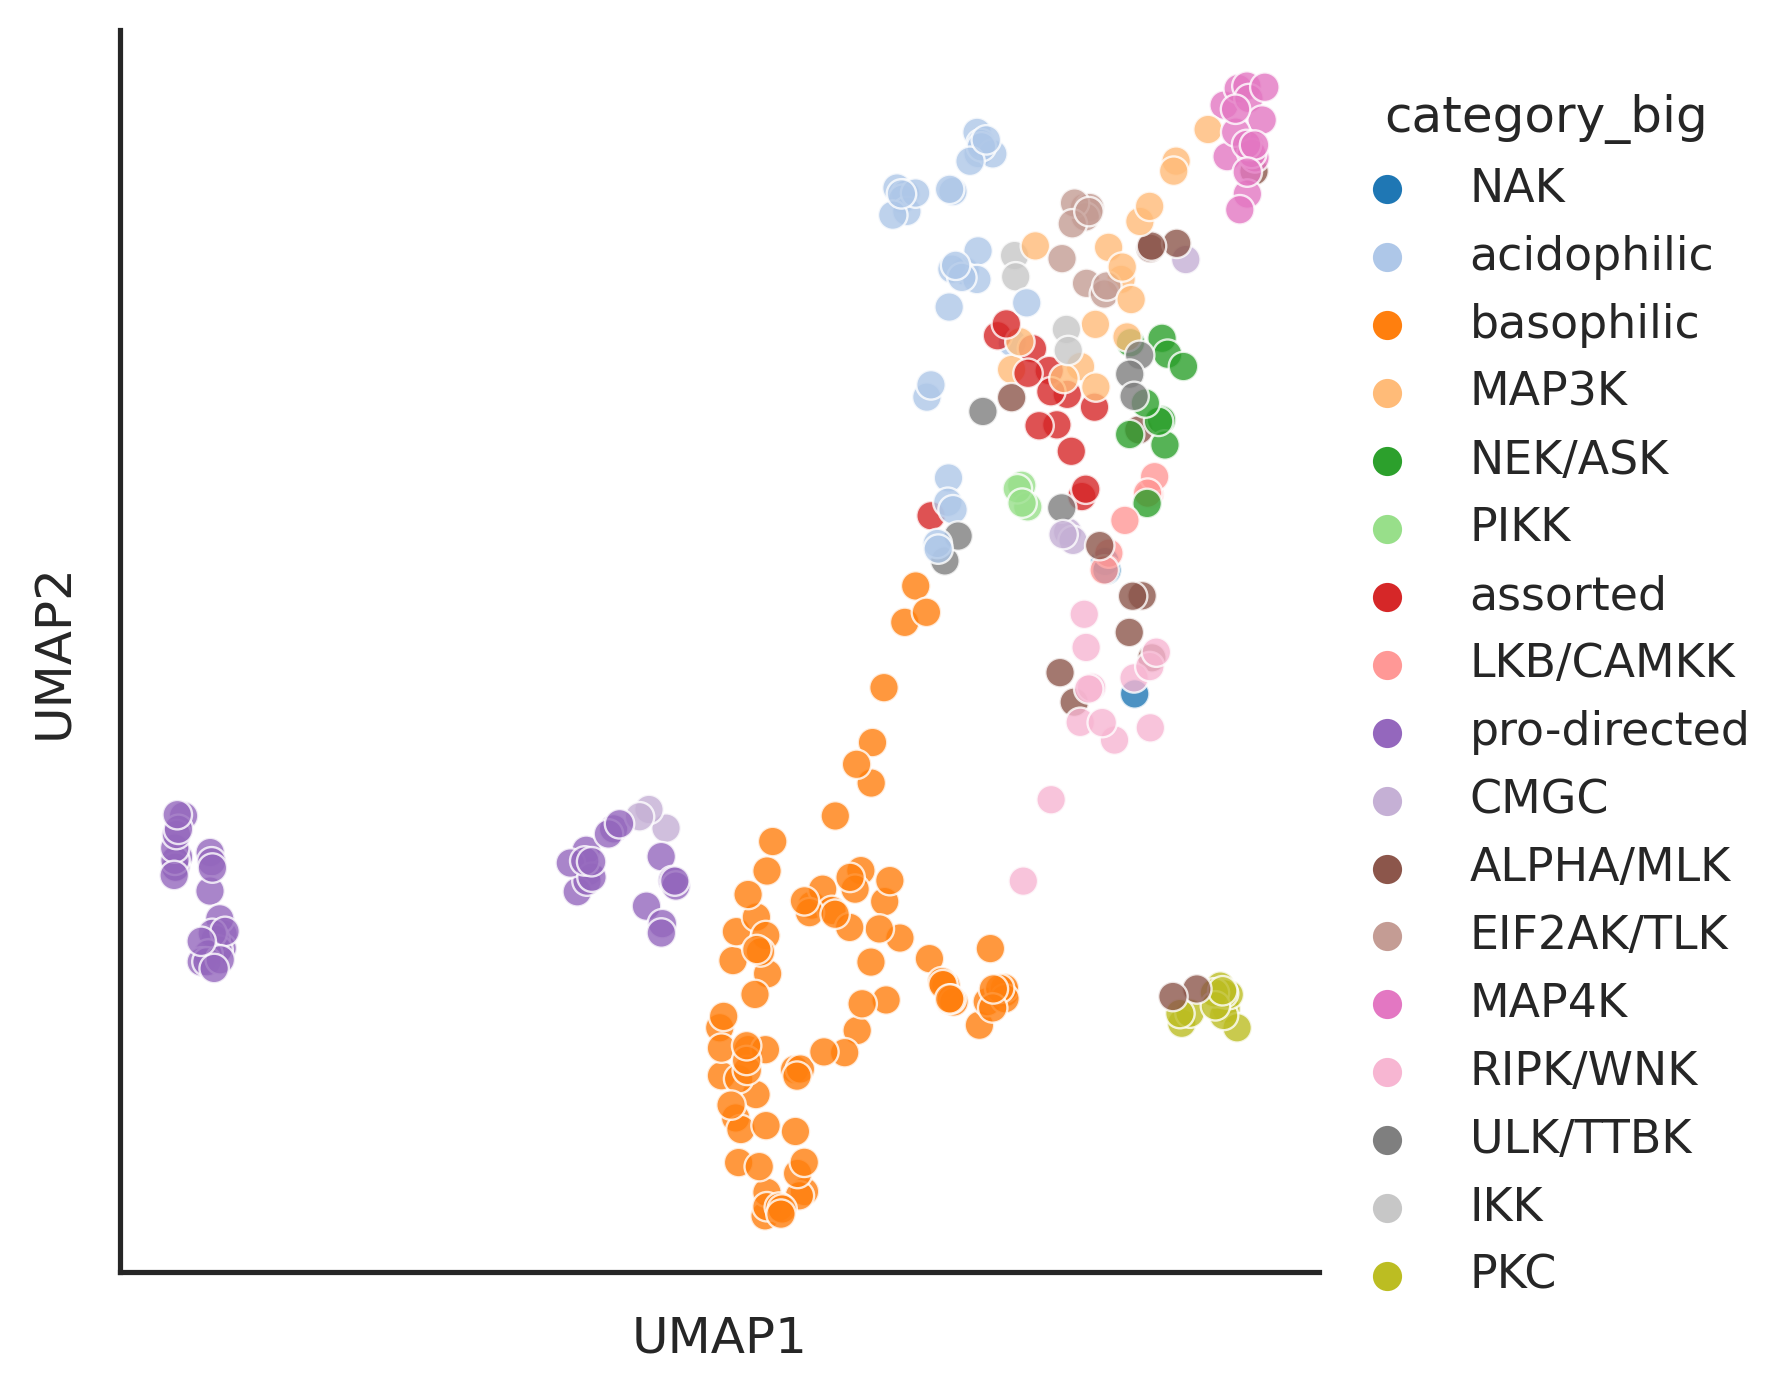

In [ ]:
plot_cluster(df2, method='umap',hue = kinase.category_big,legend=True)

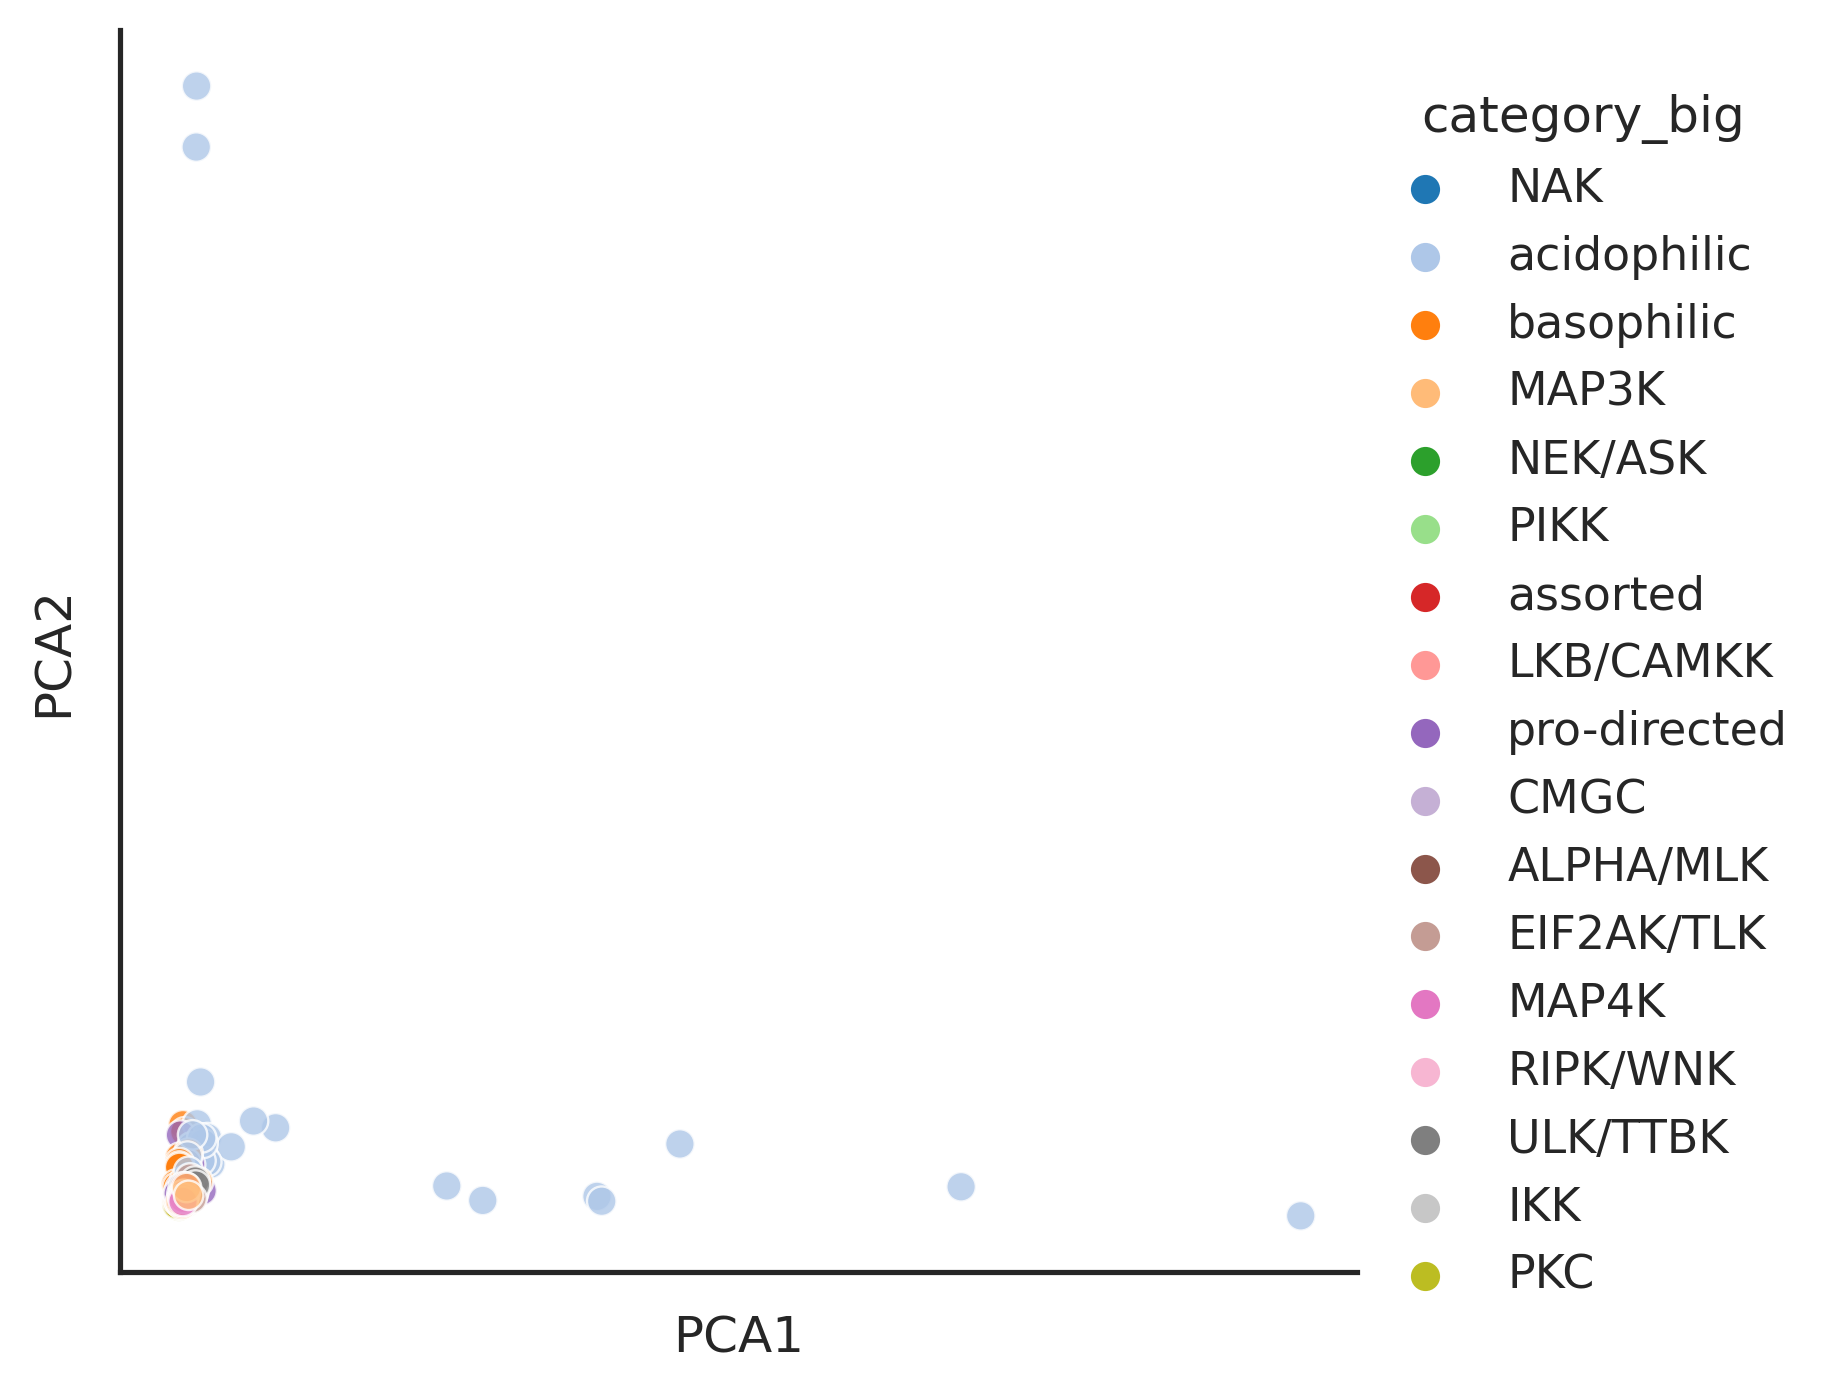

In [ ]:
plot_cluster(df2, method='pca',hue = kinase.category_big,legend=True)

## Other ways of visualization

### AE

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def AE_embed(df, encoding_dim=2, epochs=100, bs=16):
    
    X = df.iloc[:,1:].values
    
    # Define the autoencoder model
    input_dim = X.shape[1]

    # Encoder
    encoder = Sequential()
    encoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))

    # Decoder
    decoder = Sequential()
    decoder.add(Dense(input_dim, activation='sigmoid'))

    # Autoencoder
    autoencoder = Sequential([encoder, decoder])

    # Compile and train the autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X, X, epochs=epochs, batch_size=bs)

    # Obtain the encoded representations
    encoded_X = encoder.predict(X)
    
    if encoding_dim ==2:
        data = pd.DataFrame(encoded_X,columns=['AE1','AE2'])
    else:
        data = pd.DataFrame(encoded_X,index=df.kinase).reset_index()
    
    return data

In [ ]:
df = Data.get_standard_stack()

In [ ]:
data = AE_embed(df)

In [ ]:
sns.relplot( 
            data = data,
            x = 'AE1',
            y='AE2',
            hue=kinase.Family, 
            palette='tab20',
            height=5,
            s=70,
            alpha=0.8,
            edgecolor='white')

<seaborn.axisgrid.FacetGrid>

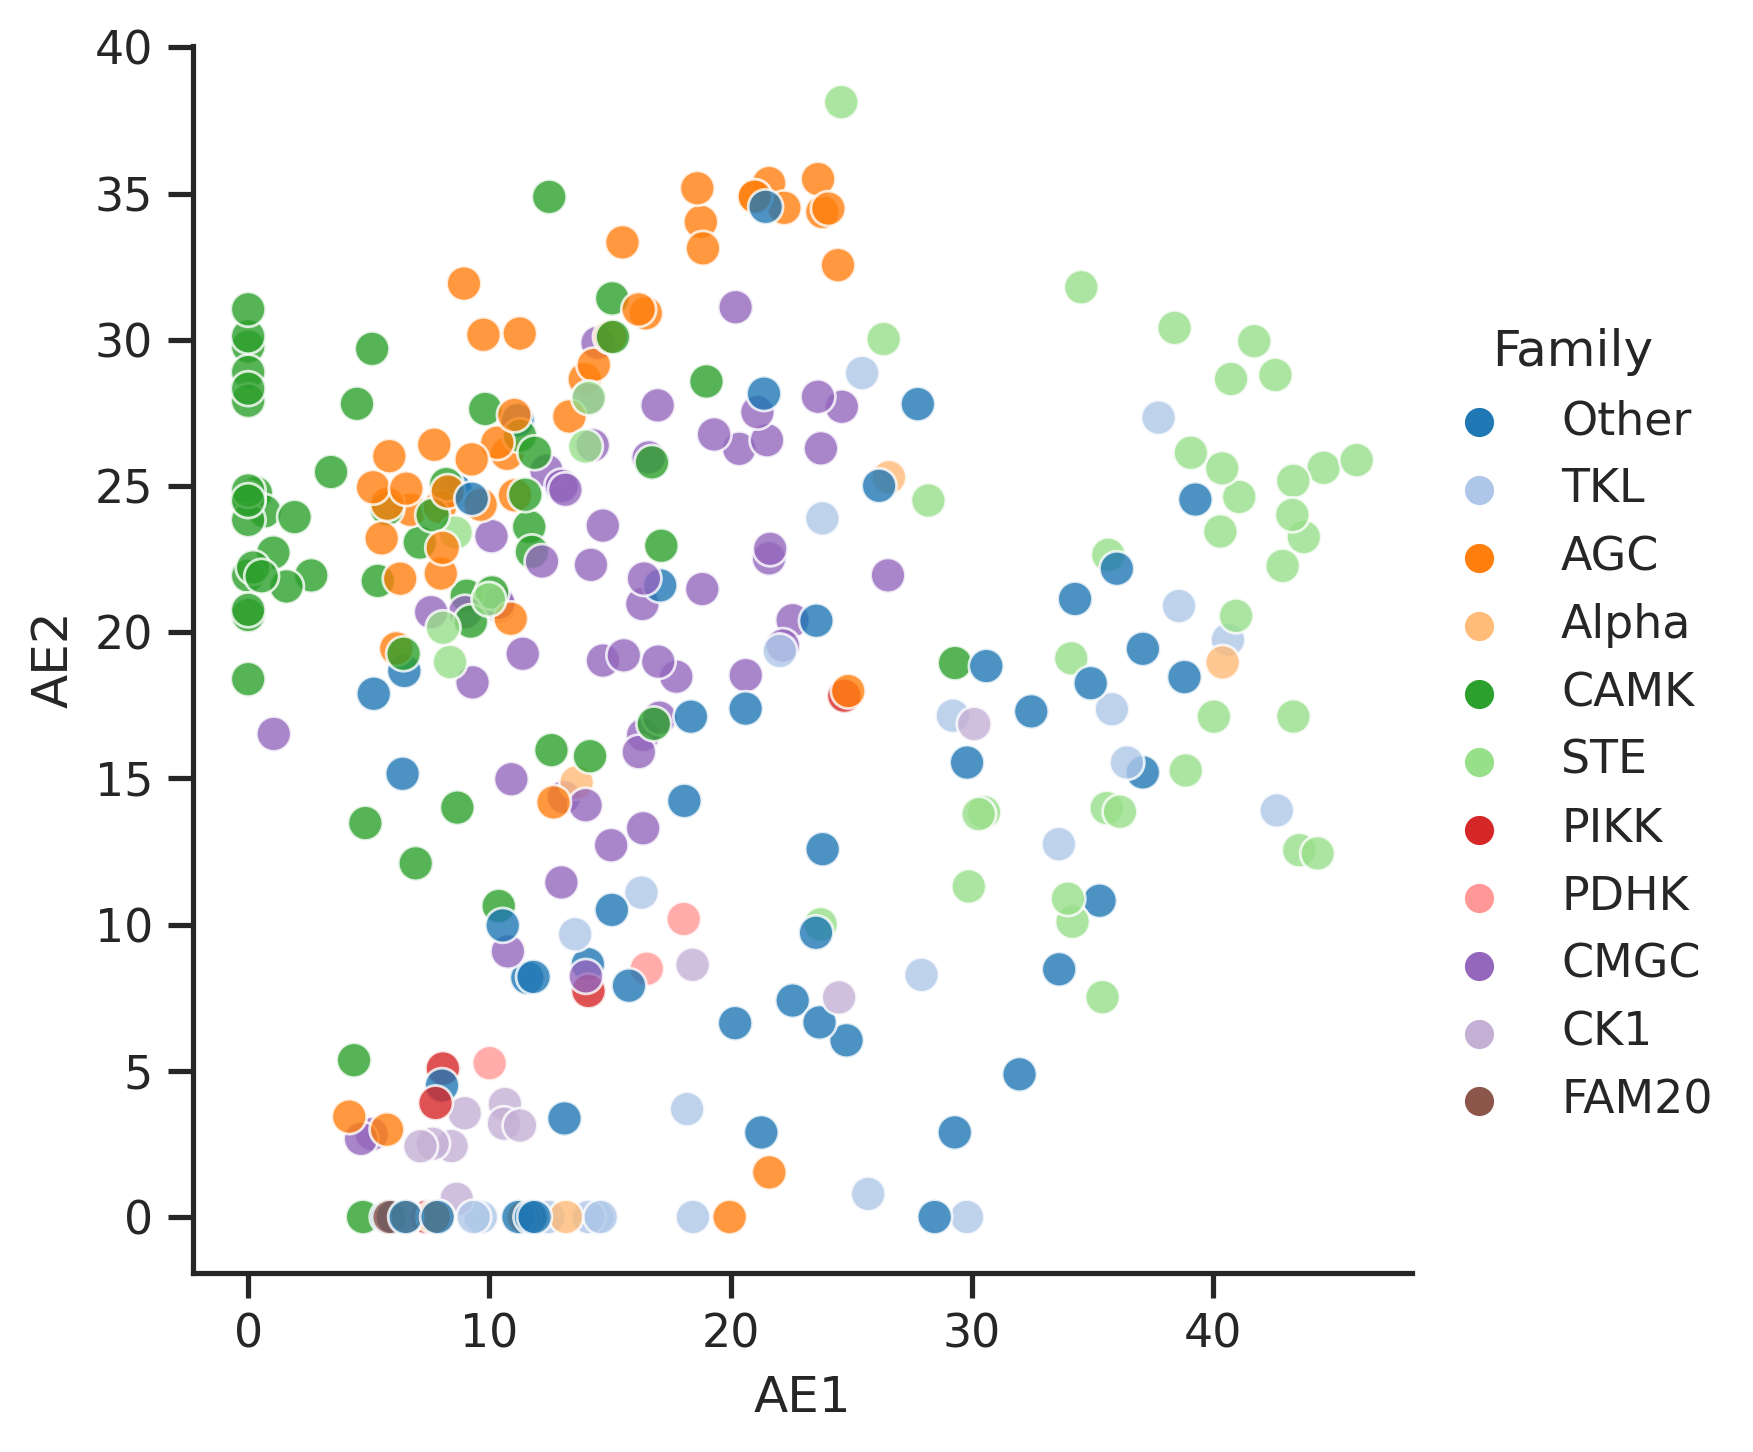

In [ ]:
sns.relplot( 
            data = data,
            x = 'AE1',
            y='AE2',
            hue=kinase.Family, 
            palette='tab20',
            height=5,
            s=70,
            alpha=0.8,
            edgecolor='white')

Or we can set the encoding dim to be 32, followed by umap reduction

In [ ]:
data = AE_embed(df, 32)

In [ ]:
plot_cluster(data, method='umap',hue = kinase.category_big,legend=True)

Let's try raw data

In [ ]:
raw = Data.get_kinase_raw()

In [ ]:
data = AE_embed(df)

In [ ]:
sns.relplot( 
            data = data,
            x = 'AE1',
            y='AE2',
            hue=kinase.Family, 
            palette='tab20',
            height=5,
            s=70,
            alpha=0.8,
            edgecolor='white')